## Importing Required Libraries

In this section, we import various Python libraries that will be used throughout the analysis and modeling process. These libraries provide tools for data manipulation, visualization, statistical analysis, machine learning, and more.

The imported libraries include:
- `re`: Regular expression operations for text processing.
- `datetime`: Module for working with dates and times.
- `numpy as np`: A library for numerical computations and arrays.
- `pandas as pd`: A powerful library for data manipulation and analysis.
- `matplotlib.pyplot as plt`: A visualization library for creating charts and plots.
- `seaborn as sns`: A higher-level interface to Matplotlib, focusing on visual aesthetics.
- `xgboost as xgb`: A popular gradient boosting library for machine learning.

Additionally, several sub-modules and classes from various libraries are also imported for specific tasks:

- `tabulate`: A utility for creating tabular data as text.
- `sklearn.compose.ColumnTransformer`: A class for composing transformers for preprocessing data columns.
- `sklearn.preprocessing.MinMaxScaler`: A preprocessing class for feature scaling.
- `sklearn.model_selection`: Modules for model selection, including train-test splitting and hyperparameter tuning.
- `sklearn.preprocessing.StandardScaler`: Classes for preprocessing data for machine learning models.
- `sklearn.ensemble.RandomForestRegressor`: Ensemble learning models.
- `sklearn.linear_model.LinearRegression`, `sklearn.linear_model.Lasso`: Linear regression models.
- `sklearn.decomposition.PCA`: Principal Component Analysis for dimensionality reduction.
- `sklearn.metrics`: Modules for various evaluation metrics.
- `sklearn.cluster.KMeans`: K-Means clustering algorithm for unsupervised learning.

In [136]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from tabulate import tabulate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans

## Load the Dataset

To begin our analysis, we load the dataset using the `pd.read_csv()` function from the Pandas library.

The dataset was taken from: https://www.kaggle.com/datasets/mexwell/steamgames

In [137]:
# Load the dataset
df = pd.read_csv('games.csv')

## Understanding DataFrame Shape in Pandas

In the context of data analysis using the Pandas library in Python, the `df.shape` attribute is used to retrieve the dimensions of a DataFrame, which is a fundamental data structure in Pandas for working with tabular data.

The `df.shape` attribute returns a tuple representing the dimensions of the DataFrame. The tuple consists of two values:
- The first value is the number of rows in the DataFrame, indicating the total number of observations or data points.
- The second value is the number of columns in the DataFrame, representing the various attributes or features associated with each observation.

For instance, if you have a DataFrame named `df` and you use the code `df.shape`, it will provide you with a tuple in the format `(num_rows, num_columns)`.

Checking the shape of a DataFrame is essential for several reasons:
1. **Data Understanding**: It gives you an immediate sense of the dataset's size and structure.
2. **Data Preparation**: Understanding the number of rows and columns helps in data preprocessing and transformation.
3. **Modeling**: It assists in selecting features and evaluating the feasibility of applying certain algorithms.

In [138]:
# Check data shape
df.shape

(71716, 39)

## Data Exploration and Preprocessing

In this section, we delve into the process of exploring and preprocessing the dataset. This phase is essential to understand the structure of the data, identify potential issues, and prepare it for further analysis and modeling.

### Checking the Structure of the Dataset

To begin, we take a look at the initial rows of the DataFrame using the `df.head()` function. This allows us to quickly grasp an overview of the data and comprehend its formatting.

### Data Type Inspection

Following that, we proceed to inspect the data types present in the DataFrame using the `df.dtypes()` function.

### Summary Statistics

Continuing our exploration, we calculate summary statistics of the DataFrame using the `df.describe()` function.

### Identifying Missing Values

Subsequently, we perform an assessment for missing values within the DataFrame using the `df.isnull().sum()` function. This step aids in identifying instances where data is absent.

In [139]:
# Check the structure of the dataset
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [140]:
# Check data types
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [141]:
# Summary statistics
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,7.171600e+04,71716.000000,42.000000,71716.000000,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000
mean,1.199222e+06,140.761197,0.343494,7.223055,0.615386,3.834207,0.044969,1.114753e+03,182.115525,98.904762,21.641977,8.981185e+02,119.158709,11.734690,106.873738,12.580833
std,5.982238e+05,5797.005513,2.362128,11.072051,14.932853,16.437707,1.901272,2.652246e+04,4975.205765,0.878178,185.583590,1.947627e+04,1230.102924,203.818348,1641.336319,221.150372
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.005350e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.176745e+06,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,9.000000e+00,3.000000,99.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.692255e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.900000e+01,18.000000,100.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.379920e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [142]:
# Check for missing values
df.isnull().sum()

AppID                             0
Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2436
Supported languages               0
Full audio languages              0
Reviews                       62549
Header image                      0
Website                       36643
Support url                   35466
Support email                 11120
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                67938
User score                        0
Positive                          0
Negative                          0
Score rank                    71674
Achievements                      0
Recommendations                   0
Notes                       

## Correlation Heatmap of Numeric Features

In this section, we generate a correlation heatmap to visualize the relationships between numerical features in the dataset. The heatmap provides insights into the strength and direction of correlations among these features.

1. **Selecting Numerical Features:**
   We start by selecting only the numerical columns from the dataframe `df`. This is done using the `select_dtypes` function with the `include=['number']` parameter. This step ensures that we are working with numeric data types for correlation analysis.

2. **Calculating Correlation Matrix:**
   We calculate the correlation matrix using the `.corr()` method on the selected numerical features. The correlation matrix is a square matrix where each entry represents the correlation coefficient between two features.

3. **Creating the Correlation Heatmap:**
   We create a visualization of the correlation matrix using a heatmap. The heatmap is generated using the `seaborn` library (`sns`) and provides a color-coded representation of the correlation coefficients. The color scale ranges from cool to warm, where cool colors indicate negative correlations, warm colors indicate positive correlations, and the center color (usually white or light gray) represents no correlation.

4. **Annotation and Color Mapping:**
   In the heatmap, each cell is annotated with its corresponding correlation coefficient. Positive correlations are indicated by warmer colors (e.g., red), while negative correlations are indicated by cooler colors (e.g., blue). The center of the color scale (often represented by a white or light gray color) corresponds to zero correlation.

5. **Interpretation:**
   By observing the heatmap, you can identify pairs of features that are strongly correlated (positive or negative) or not correlated at all. Correlation heatmaps are valuable for identifying potential multicollinearity between features and understanding which features might influence each other.

The correlation heatmap serves as a powerful visualization tool for understanding relationships within the numerical features of the dataset and can guide feature selection, engineering, and modeling decisions.


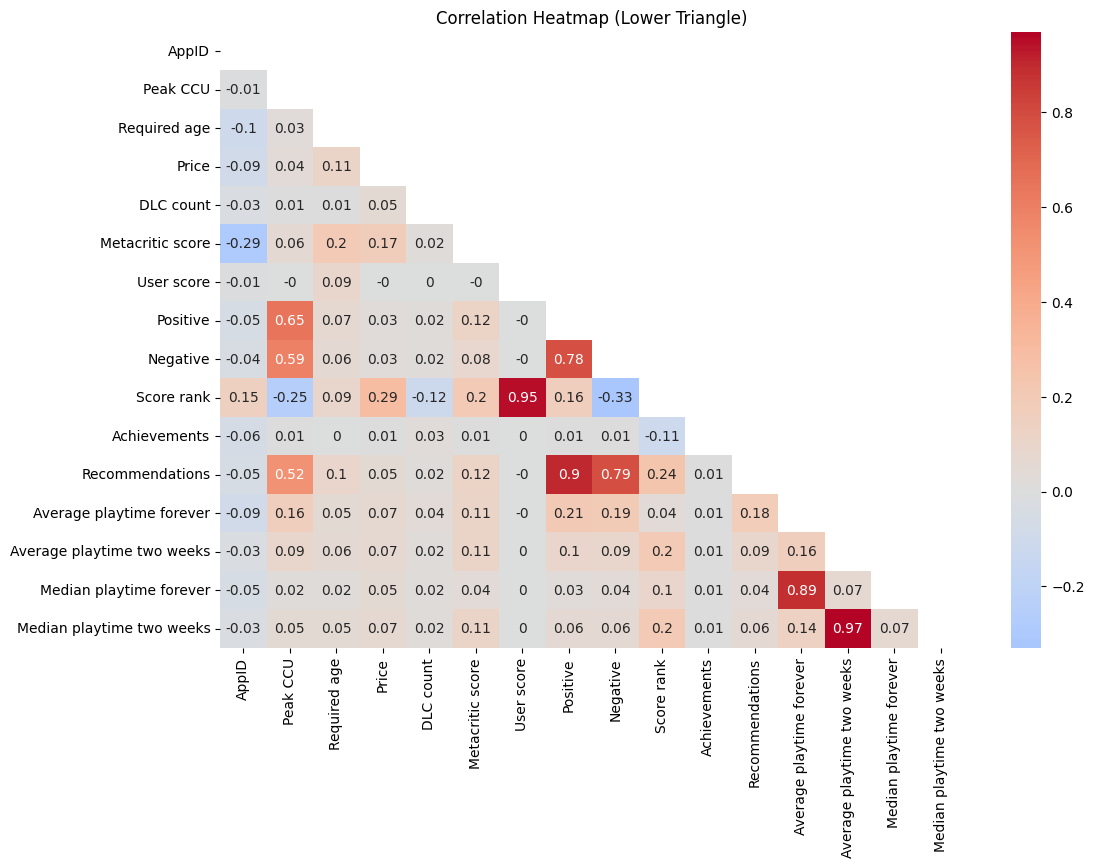

In [143]:
# Assuming your dataframe is named 'df'
numeric_features = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numeric_features.corr().round(2)  # Round the correlation values to 2 decimal places

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a correlation heatmap using seaborn with masked upper triangle
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

## Drop Irrelevant Columns

In this step, we remove columns from the DataFrame that are considered irrelevant for our analysis or modeling. These columns do not contribute substantially to our objectives and are therefore being dropped.

To achieve this, we utilize the `df.drop()` function with the `axis=1` parameter to indicate that we are dropping columns, and `inplace=True` to ensure that the changes are applied directly to the DataFrame.

The following columns are being dropped:
- **AppID**: An identifier for individual applications or games, not directly relevant to the analysis.
- **About the game**: Textual descriptions or summaries of the games, not be central to the analysis.
- **Header image**: URLs or links to header images for the games, not crucial for the analysis.
- **Website**: URLs for official game websites, not website-related analysis, so this can be dropped.
- **Support url**: URLs for game support pages, not support-related analysis is intended.
- **Support email**: Email addresses for game support, no support analysis is planned.
- **Metacritic url**: URLs for Metacritic pages, not needed.
- **Screenshots**: URLs or links to game screenshots, no image analysis, these URLs can be removed.
- **Movies**: URLs or links to game videos or trailers, no video content analysis is intended.
- **Reviews**: Text or URLs for game reviews, not needed.
- **Score rank**: Rank information based on scores, most values were missing so most logical to remove.


In [144]:
# Drop irrelevant columns
df.drop(['AppID', 'About the game', 'Header image', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Screenshots', 'Movies', 'Reviews', 'Score rank'], axis=1, inplace=True)

### Recheck data

Use `df.dtypes()` and `df.isnull().sum()` to recheck the DataFrame after we droped columns.

In [145]:
# Check data types
df.dtypes

Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
Supported languages            object
Full audio languages           object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Achievements                    int64
Recommendations                 int64
Notes                          object
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers                     object
Publishers                     object
Categories                     object
Genres      

In [146]:
# Check for missing values
df.isnull().sum()

Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Notes                         61274
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     2461
Publishers                     2720
Categories                     3407
Genres                         2439
Tags                        

## Feature Engineering

### Adding Price Range Category

We create a new column 'Price range' to categorize games based on their price range. This categorization is done using the `pd.cut()` function. 

The bins and corresponding labels are defined to group games into categories like 'Free', '$0.1-$10', '$10-$20', '$20-$30', '$30-$40', '$40-$60', and '$60+'. 

### Converting 'Release date' Column

The 'Release date' column is converted to the datetime format using the `pd.to_datetime()` function with the specified date format `mixed`.


### Creating 'Release by Quarter' Columns

We create two new columns: 'Release by Year and Quarter' and 'Release by Quarter'. 'Release by Year and Quarter' is created by using the `dt.to_period('Q')` method on the 'Release date' column to group games by the year and quarter they were released in. 'Release by Quarter' is then formatted by appending 'Q' to the quarter value.

### Creating 'Has_English' Column

We create a new binary column 'Has_English' to indicate whether a game has English language support. It's initialized to 0 and then iterated over the 'Supported languages' column to update it to 1 if English is present.

### Creating 'UNIX_Release_date' Column

We create a new column to represent the data by a UNIX format to more easily do calculations on later.

### Creating 'Max Peak CCU' Column

We extract the year from the 'Release date' column and store it in a new column 'Year'. This allows us to analyze and group the data by year.

Next, we group the data by the 'Year' column and calculate the maximum peak CCU (Concurrent Current Users) for each year using the `groupby()` function and the `max()` aggregation.

We then merge the calculated maximum peak CCU values back to the original DataFrame based on the 'Year' column, adding a new column named 'Max Peak CCU'. This information provides insights into the highest concurrent users each year.

After merging the data, we drop the intermediate 'Year' column, as it's no longer needed for analysis.

### Creating Columns for Counting

We create several new columns to count the number of publishers, categories, genres, and tags for each entry in the dataset. These counts provide additional insights into the content and variety of each game.

In [147]:
# Feature: Price range category
df["Price range"] = pd.cut(df["Price"], bins=[float("-inf"), 0, 10, 20, 30, 40, 60, float("inf")], labels=["Free", "$0.1-$10", "$10-$20", "$20-$30", "$30-$40", "$40-$60", "$60+"],)

# Convert 'Release date' column to datetime format
df["Release date"] = pd.to_datetime(df["Release date"], format="mixed")

# Create 'Release by Quarter' column
df["Release by Year and Quarter"] = df["Release date"].dt.to_period("Q")

# Create 'Release by Quarter' column in the format 'Q4'
df["Release by Quarter"] = "Q" + df["Release date"].dt.quarter.astype(str)

# Create a new feature 'Has_English' with default value 0
df["Has_English"] = 0

# Iterate over the 'Supported languages' column and update 'Has_English' to 1 if English is present
for index, languages in enumerate(df["Supported languages"]):
    if "English" in languages:
        df.loc[index, "Has_English"] = 1

# Create new feature 'UNIX_Release_date' 
df["UNIX_Release_date"] = df["Release date"]
df["UNIX_Release_date"] = df["Release date"].apply(lambda x: int(datetime.datetime.timestamp(x)))

# Extract the year from the 'datetime' column
df["Year"] = df["Release date"].dt.year

# Group by year and calculate the maximum peak CCU
max_peak_ccu_by_year = df.groupby("Year")["Peak CCU"].max()

# Merge the max peak CCU back to the original DataFrame
df = df.merge(max_peak_ccu_by_year, left_on="Year", right_index=True, suffixes=("", "_Max_Peak_CCU"))

# Rename the merged column
df = df.rename(columns={"Peak CCU_Max_Peak_CCU": "Max Peak CCU"})

# Drop the intermediate 'Year' column if needed
df.drop("Year", axis=1, inplace=True)

# Create a new column to count the number of publishers for each entry
df["num_Publishers"] = (df["Publishers"].str.split(",").apply(lambda x: len(x) if isinstance(x, list) else 0))

# Create a new column to count the number of categories for each entry
df["num_Categories"] = (df["Categories"].str.split(",").apply(lambda x: len(x) if isinstance(x, list) else 0))

# Create a new column to count the number of genres for each entry
df["num_Genres"] = (df["Genres"].str.split(",").apply(lambda x: len(x) if isinstance(x, list) else 0))

# Create a new column to count the number of tags for each entry
df["num_Tags"] = (df["Tags"].str.split(",").apply(lambda x: len(x) if isinstance(x, list) else 0))

### Removing Symbols from 'Supported languages' Column

We remove symbols and unnecessary whitespaces from the 'Supported languages' column using regular expressions. This step helps to clean the data and prepare it for further analysis.

### Removing Symbols from 'Full audio languages' Column

Similar to the previous step, we remove symbols and whitespaces from the 'Full audio languages' column, ensuring consistent formatting and accurate data representation.

### Counting Supported Languages and Full Audio Languages

We create new columns to count the number of supported languages and full audio languages for each entry. These columns provide insights into the variety of languages available for each game.

### Converting Boolean Columns to Integers

Certain boolean columns (such as 'Windows', 'Mac', and 'Linux') are converted to integers to represent the presence (1) or absence (0) of a specific platform.

### Calculating the Number of Platforms

We calculate the total number of platforms supported for each game by summing up the integer values from the 'Windows', 'Mac', and 'Linux' columns.

### Calculating Rating Ratio

The rating ratio is calculated based on the 'Positive' and 'Negative' reviews. If both values are zero, the ratio is set to zero. Otherwise, it is calculated as the ratio of positive reviews to the sum of positive and negative reviews.

### Calculating Price per Playtime

We calculate the price per playtime for different playtime metrics, such as average playtime forever and average playtime two weeks. These calculations help us understand the pricing structure relative to the amount of playtime users get.

In [148]:
# Remove symbols from 'Supported languages' column
df["num_Supported languages"] = df["Supported languages"].str.replace(r"\(|\)|\[|\]", "", regex=True)
df["num_Supported languages"] = df["num_Supported languages"].str.replace(r"\s+", " ", regex=True)

# Remove symbols from 'Full audio languages' column
df["num_Full audio languages"] = df["Full audio languages"].str.replace(r"\(|\)|\[|\]", "", regex=True)
df["num_Full audio languages"] = df["num_Full audio languages"].str.replace(r"\s+", " ", regex=True)

# Create a new column to count the number of supported languages for each entry
df["num_Supported languages"] = (df["num_Supported languages"].str.split(", ").apply(lambda x: len(x) if isinstance(x, list) else 0))

# Create a new column to count the number of full audio languages for each entry
df["num_Full audio languages"] = (df["num_Full audio languages"].str.split(", ").apply(lambda x: len(x) if isinstance(x, list) and x[0] != "" else 0))

# Convert boolean columns to integers
df["Windows"] = df["Windows"].astype(int)
df["Mac"] = df["Mac"].astype(int)
df["Linux"] = df["Linux"].astype(int)

# Calculate the number of platforms
df["num_Platforms"] = df["Windows"] + df["Linux"] + df["Mac"]

# Calculate rating ratio
df["Review Ratio"] = np.where((df["Positive"] == 0) & (df["Negative"] == 0), 0, df["Positive"] / (df["Positive"] + df["Negative"]))

# Calculate price per Average playtime forever
df["Price per Avg Playtime Forever"] = np.where(df["Average playtime forever"] == 0, 0, df["Price"] / df["Average playtime forever"])

# Calculate price per Average playtime two weeks
df["Price per Avg Playtime Two Weeks"] = np.where(df["Average playtime two weeks"] == 0, 0, df["Price"] / df["Average playtime two weeks"])

# Calculate price per Median playtime forever
df["Price per Median Playtime Forever"] = np.where(df["Median playtime forever"] == 0, 0, df["Price"] / df["Median playtime forever"])

# Calculate price per Median playtime two weeks
df["Price per Median Playtime Two Weeks"] = np.where(df["Median playtime two weeks"] == 0, 0, df["Price"] / df["Median playtime two weeks"])

## Data Cleaning and Final Steps

### Removing Unreleased Games

We obtain today's date using the `pd.Timestamp` function and the `datetime.date.today()` method.

We filter out games that have a release date after today, ensuring that only released games are considered for analysis.

### Renaming 'Price' Column

We rename the 'Price' column to 'Price_(usd)' for clarity.

### Adding 'Content_Warning' Column

We create a new column 'Content_Warning_Indicator' that indicates the presence of content warnings based on the 'Notes' column.

We then remove the 'Notes' column from the DataFrame.

### Frequency Distribution for Game Names

We calculate the frequency distribution of game names to identify duplicate entries.

We then remove duplicate entries while preserving distinct entries.

### Cleaning 'Developers', 'Publishers', 'Name' Columns

We convert the columns to a string type and remove specific terms associated with play tests, alphas, and betas.

### Filling NaN Values

We fill NaN values in 'Categories', 'Genres', and 'Tags' columns with the label 'Unknown'.

In [149]:
# Data cleaning and final steps
# -----------------------------------------------------

# Get today's date
today = pd.Timestamp(datetime.date.today())

# Remove all games who were not released yet
df = df[df['Release date'] <= today]

# Rename 'Price' column to 'price_usd'
df = df.rename(columns={'Price': 'Price_(usd)'})

# Add 'Content_Warning' column
df['Content_Warning_Indicator'] = df['Notes'].apply(lambda x: 1 if pd.notna(x) else 0)

# Remove 'Notes' column
df = df.drop('Notes', axis=1)

# Frequency distribution for game names
value_counts = df['Name'].value_counts()
print(value_counts)

# Get the names that appear more than once
duplicate_names = value_counts[value_counts > 1].index
print(duplicate_names)
print(len(duplicate_names))

counter = 0
# Iterate over the duplicate names
for name in duplicate_names:
    # Get the rows with the current name
    rows = df[df['Name'] == name]

    # Check if all rows are the same
    if not rows.equals(rows.iloc[0]):
        # Rows are not the same, remove all the rows with the current name
        df = df[df['Name'] != name]
        counter += 1

    else:
        df = df.drop(rows.index[1:])

print(counter)

# Convert Developers column to string type
df['Developers'] = df['Developers'].astype(str)

# List of appearances of play tests, alphas, and betas
test_arr = [', Inc.', ', LLC', ', Inc', ', LTD.', ', LTD', ',LTD', ',Inc', ',Inc.', ',Ltd.']

# Create a single string pattern
pattern = '|'.join(re.escape(term) for term in test_arr)

# Remove play tests, alphas, and betas from the data
df['Developers'] = df['Developers'].str.replace(pattern, '', flags=re.IGNORECASE, regex=True)

# Convert Publishers column to string type
df['Publishers'] = df['Publishers'].astype(str)

# Remove play tests, alphas, and betas from the data
df['Publishers'] = df['Publishers'].str.replace(pattern, '', flags=re.IGNORECASE, regex=True)

# Convert Name column to string type
df['Name'] = df['Name'].astype(str)

# List of appearances of play tests, alphas, and betas
test_arr = ['Playtest', 'playtest', 'Play Test', 'Dedicated Server', 'Beta', 'BETA', 'beta', '(Alpha', 'Pre-Alpha',
            'pre-alpha', '(alpha)', 'Alpha)', '[Alpha', '[Play Test]', 'Test Version', 'Closed Alpha'
            'Pre-Season Preview', 'Multiplayer Test', 'DevTest', 'Technical Test', 'Free Multiplayer session']

# Create a single string pattern
pattern = '|'.join(re.escape(term) for term in test_arr)

# Remove play tests, alphas, and betas from the data
df = df[~df['Name'].str.contains(pattern, flags=re.IGNORECASE, regex=True)]

# Convert NaN values to empty string
df['Categories'] = df['Categories'].fillna('Unknown')

# Convert NaN values to empty string
df['Genres'] = df['Genres'].fillna('Unknown')

# Convert NaN values to empty string
df['Tags'] = df['Tags'].fillna('Unknown')

Name
Shadow of the Tomb Raider: Definitive Edition    20
Escape                                            5
Tom Clancy's Rainbow Six® Siege                   5
Alone                                             5
Train Simulator Classic                           5
                                                 ..
Shakes on a Plane                                 1
BubbleBubbleBall                                  1
The Watcher                                       1
Obey Me                                           1
Hentai Ariel                                      1
Name: count, Length: 71168, dtype: int64
Index(['Shadow of the Tomb Raider: Definitive Edition', 'Escape',
       'Tom Clancy's Rainbow Six® Siege', 'Alone', 'Train Simulator Classic',
       'Nightmare', 'Aurora', 'Space Survival', 'Lost', 'Jewel Quest Pack',
       ...
       'Call of Duty®: Black Ops II', 'Solstice',
       'Call of Duty®: Modern Warfare® 3',
       'The Legend of Heroes: Kuro no Kiseki', 'Three Quar

## Data summary and final checks

### Data Shape Inspection

Once again, we inspect the data shape of the altered DataFrame using the `df.shape` function.

### Data Type Inspection

Further more, we inspect the data types present in the altered DataFrame using the `df.dtypes()` function.

### Summary Statistics

We calculate summary statistics of the altered DataFrame using the `df.describe()` function.

### Identifying Missing Values

Also, we check for missing values within the DataFrame using the `df.isnull().sum()` function.

### Correlation Heatmap of Numeric Features

Lastly, we generate a correlation heatmap to visualize the relationships between numerical features in the altered dataset. The heatmap provides insights into the strength and direction of correlations among these features.

In [150]:
# Check data shape
df.shape

(68334, 46)

In [151]:
# Check data types
df.dtypes

Name                                           object
Release date                           datetime64[ns]
Estimated owners                               object
Peak CCU                                        int64
Required age                                    int64
Price_(usd)                                   float64
DLC count                                       int64
Supported languages                            object
Full audio languages                           object
Windows                                         int32
Mac                                             int32
Linux                                           int32
Metacritic score                                int64
User score                                      int64
Positive                                        int64
Negative                                        int64
Achievements                                    int64
Recommendations                                 int64
Average playtime forever    

In [152]:
# Summary statistics
df.describe()

,Release date,Peak CCU,Required age,Price_(usd),DLC count,Windows,Mac,Linux,Metacritic score,User score,...,num_Tags,num_Supported languages,num_Full audio languages,num_Platforms,Review Ratio,Price per Avg Playtime Forever,Price per Avg Playtime Two Weeks,Price per Median Playtime Forever,Price per Median Playtime Two Weeks,Content_Warning_Indicator
count,68334,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,...,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000,68334.000000
mean,2019-09-25 16:49:11.058038528,142.424620,0.338777,7.478588,0.583999,0.999620,0.209588,0.143457,3.862704,0.047195,...,10.248471,3.622940,1.118301,1.352665,0.620390,0.049959,0.024550,0.049506,0.024227,0.150672
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-02-05 00:00:00,0.000000,0.000000,0.990000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,0.000000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-04-22 00:00:00,0.000000,0.000000,4.990000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021-11-28 18:00:00,1.000000,0.000000,9.990000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,3.000000,1.000000,1.000000,0.911279,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-04-03 00:00:00,872138.000000,21.000000,999.000000,2366.000000,1.000000,1.000000,1.000000,97.000000,100.000000,...,21.000000,103.000000,103.000000,3.000000,1.000000,49.990000,74.990000,49.990000,74.990000,1.000000
std,NaN,5900.211603,2.344939,11.186819,14.146182,0.019502,0.407018,0.350541,16.473677,1.947727,...,7.659108,6.697307,4.681805,0.672980,0.356803,0.586776,0.598618,0.583949,0.597715,0.357731


In [153]:
# Check for missing values
df.isnull().sum()

Name                                   0
Release date                           0
Estimated owners                       0
Peak CCU                               0
Required age                           0
Price_(usd)                            0
DLC count                              0
Supported languages                    0
Full audio languages                   0
Windows                                0
Mac                                    0
Linux                                  0
Metacritic score                       0
User score                             0
Positive                               0
Negative                               0
Achievements                           0
Recommendations                        0
Average playtime forever               0
Average playtime two weeks             0
Median playtime forever                0
Median playtime two weeks              0
Developers                             0
Publishers                             0
Categories      

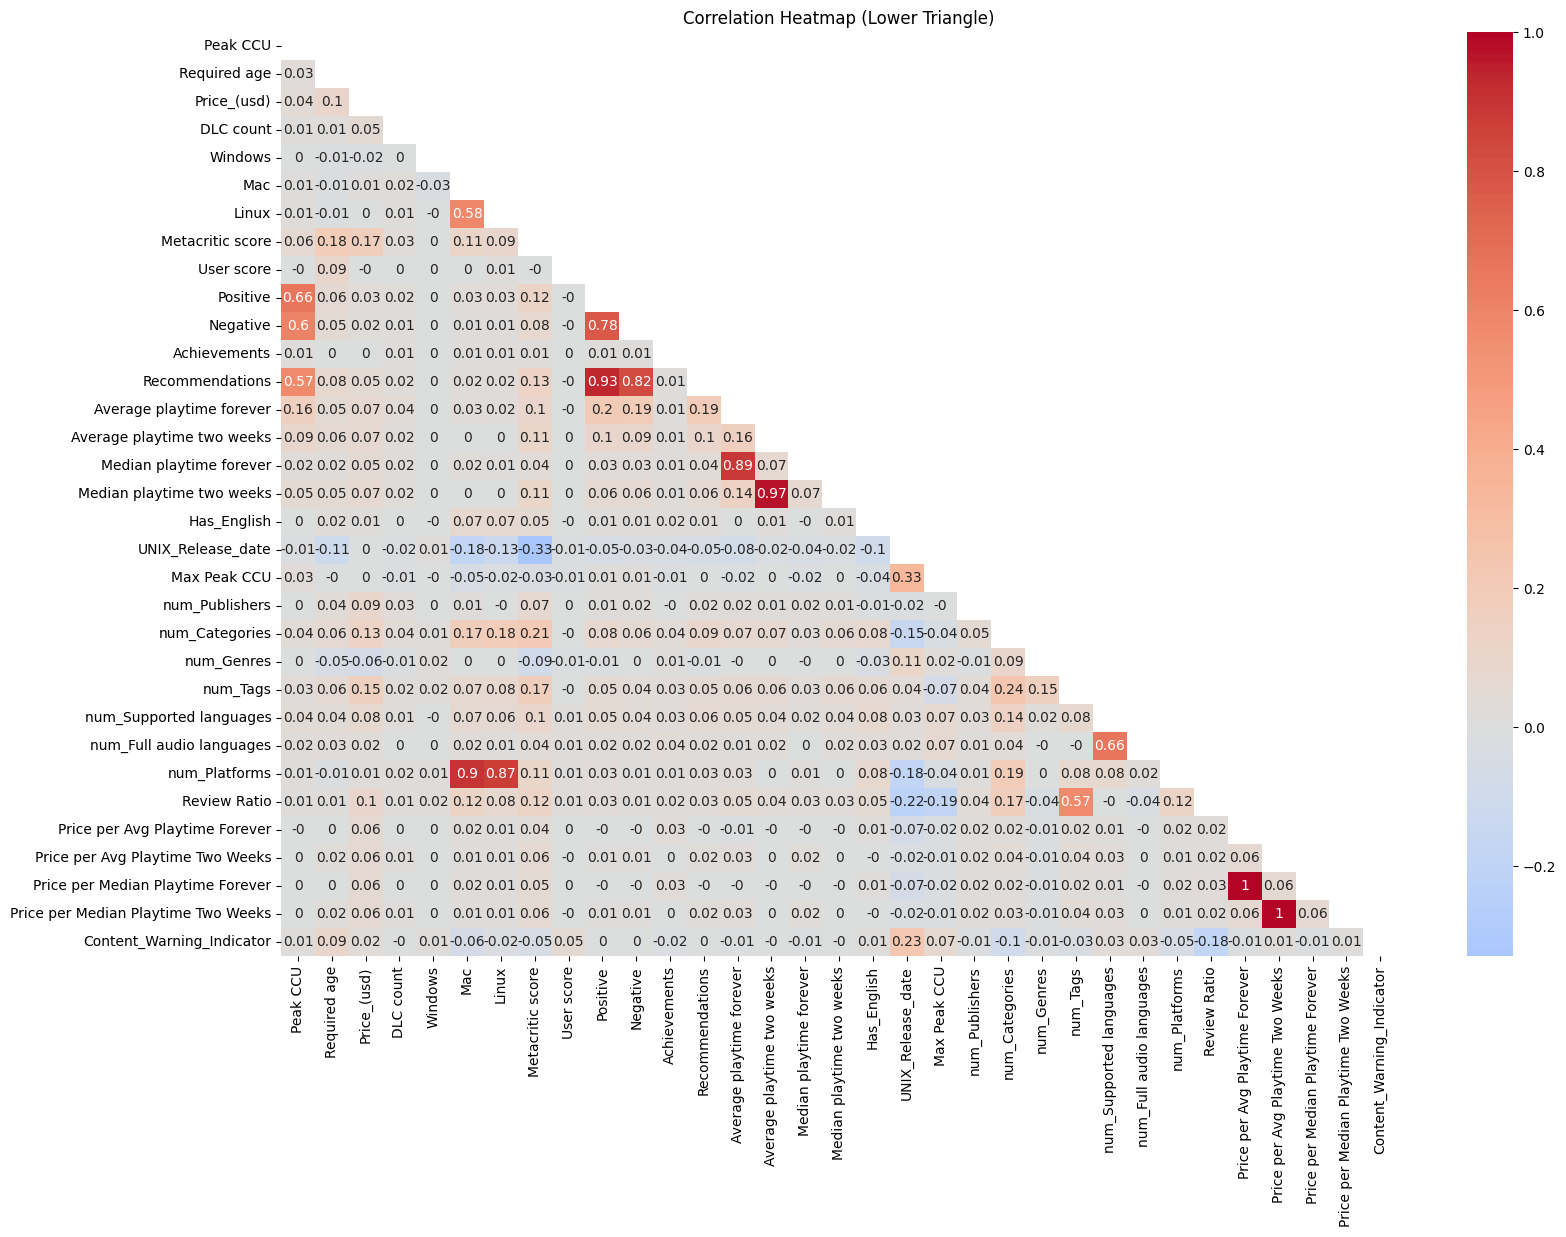

In [154]:
# Assuming your dataframe is named 'df'
numeric_features = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numeric_features.corr().round(2)  # Round the correlation values to 2 decimal places

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a correlation heatmap using seaborn with masked upper triangle
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

## Save the Dataset

To make it easier to keep working, we save the dataset using the `pd.to_csv()` function from the Pandas library.

In [156]:
# Save to reduced csv
df.to_csv('games_reduced.csv', index=False)

## Frequency Distribution and Visualization

### Create Histogram for Peak CCU

We create a histogram to visualize the distribution of the "Peak CCU" values. The x-axis is set to a logarithmic scale.

### Counting Games by Operating System

We count the number of games available for each operating system and create a bar plot to visualize the distribution.

### Max Peak CCU by Year
We extract the year from the 'Release date' column, calculate the maximum peak CCU by year, and create a line plot to visualize the trend.

### Data Analysis and Visualization

Let's explore various aspects of the dataset by performing frequency analysis and visualization on the following columns:

1. **Estimated Owners**: This column represents the estimated number of owners for each game. We'll analyze the frequency distribution of these estimates.

2. **Price Range**: The "Price range" column categorizes games based on their price. We'll examine the distribution of games within each price range.

3. **Required Age**: This column indicates the minimum age required to play a game. We'll analyze how games are distributed across different age requirements.

4. **Number of Publishers**: We'll analyze the frequency distribution of the count of publishers for each game.

5. **Number of Categories**: Similar to the previous case, we'll analyze the distribution of the count of categories associated with each game.

6. **Has English**: This binary column indicates whether a game supports the English language. We'll examine the distribution of games that have English language support.

7. **Number of Genres**: We'll analyze the distribution of the count of genres associated with each game.

8. **Number of Tags**: Similar to genres, we'll analyze the distribution of the count of tags associated with each game.

9. **Number of Supported Languages**: We'll analyze the distribution of the count of supported languages for each game.

10. **Number of Full Audio Languages**: This column represents the count of full audio languages for each game. We'll examine its distribution.

11. **Number of Platforms**: We'll analyze the distribution of the count of platforms (Windows, Linux, Mac) that each game supports.

12. **Content Warning Indicator**: This binary column indicates whether a content warning is associated with a game. We'll examine the distribution of games with and without content warnings.

13. **Release by Quarter**: This column represents the quarter in which a game was released. We'll analyze the distribution of game releases across different quarters.

Each of these analyses will help us gain insights into the characteristics of the games in the dataset and how they are distributed based on different attributes.


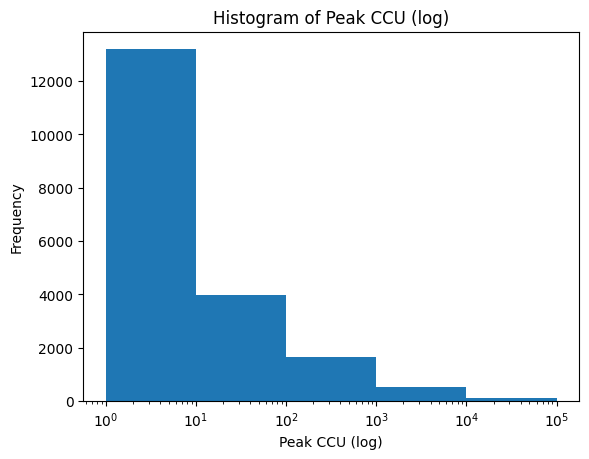

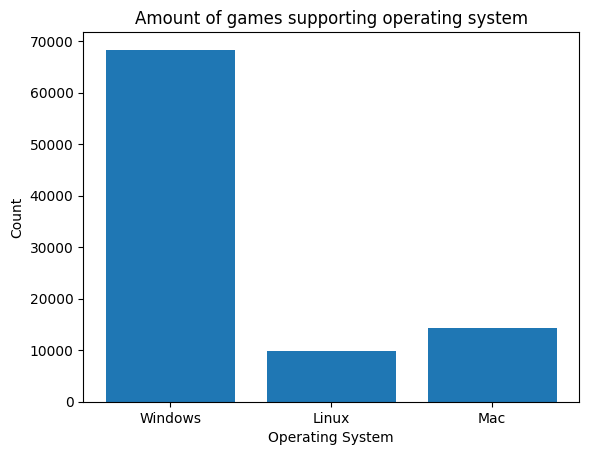

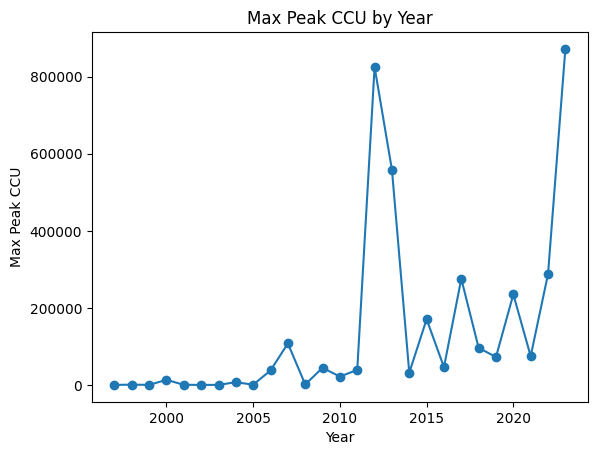

Frequency Analysis - Estimated owners :
 Estimated owners
0 - 20000                46694
20000 - 50000             7204
0 - 0                     4677
50000 - 100000            3575
100000 - 200000           2391
200000 - 500000           2015
500000 - 1000000           864
1000000 - 2000000          472
2000000 - 5000000          301
5000000 - 10000000          81
10000000 - 20000000         35
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64 



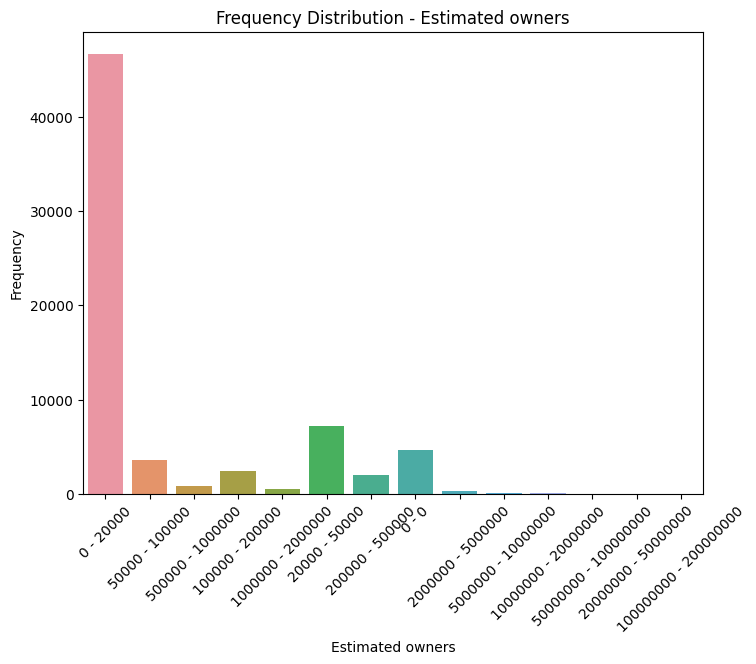

Frequency Analysis - Price range :
 Price range
$0.1-$10    44381
$10-$20     10722
Free         9819
$20-$30      2074
$30-$40       651
$40-$60       502
$60+          185
Name: count, dtype: int64 



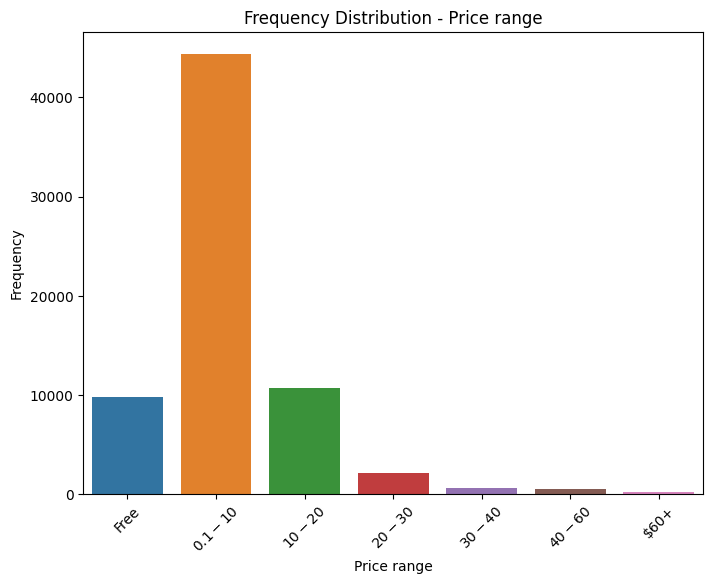

Frequency Analysis - Required age :
 Required age
0     66907
17      777
18      307
13      181
16       60
10       31
12       30
15        8
7         7
3         7
6         6
21        5
14        4
19        1
5         1
20        1
1         1
Name: count, dtype: int64 



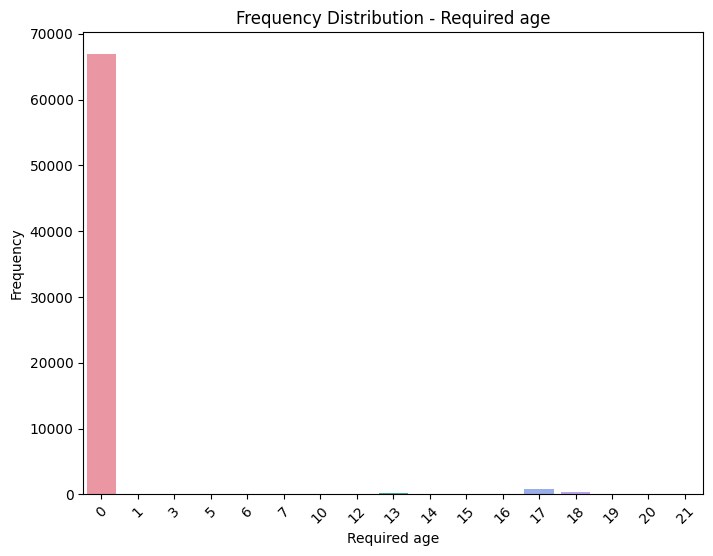

Frequency Analysis - num_Publishers :
 num_Publishers
1    63950
2     3689
0      380
3      264
4       45
5        5
6        1
Name: count, dtype: int64 



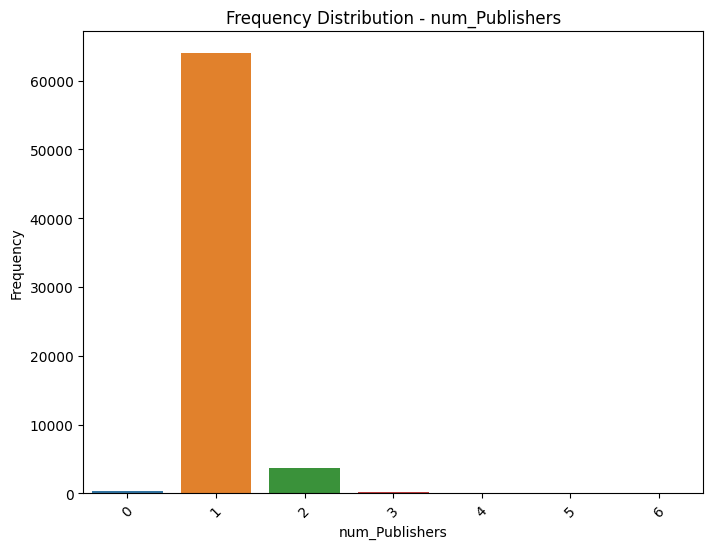

Frequency Analysis - num_Categories :
 num_Categories
1     19771
2     14659
3     10021
4      7166
5      4371
6      3125
7      2225
8      1803
9      1352
0      1077
10      988
11      647
12      451
13      281
14      166
15      111
16       48
17       36
18       20
19        6
20        6
21        3
22        1
Name: count, dtype: int64 



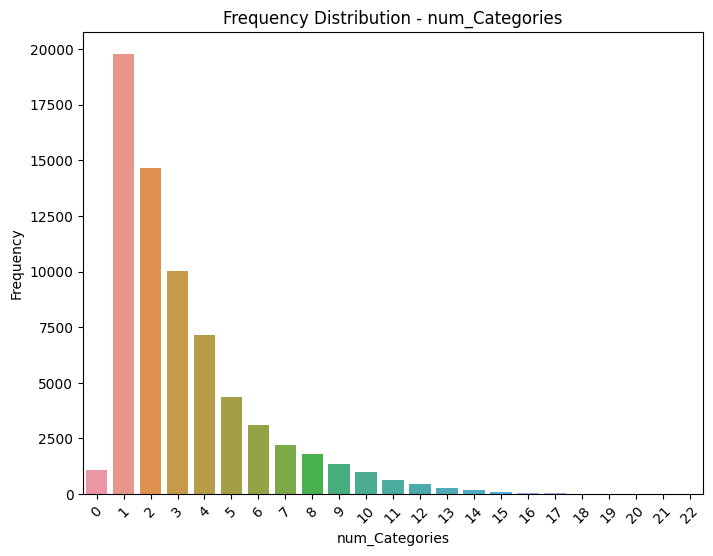

Frequency Analysis - Has_English :
 Has_English
1    65529
0     2805
Name: count, dtype: int64 



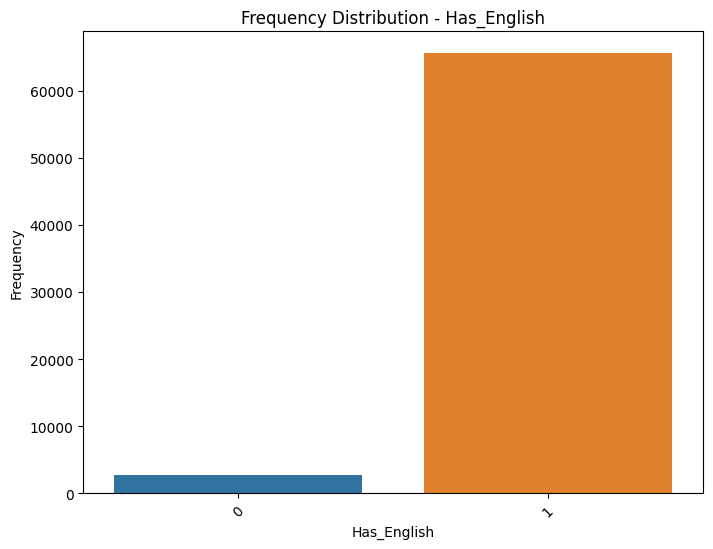

Frequency Analysis - num_Genres :
 num_Genres
3     19824
2     19309
4     10861
1     10518
5      4968
6      1854
7       591
8       190
0       112
9        66
10       26
11       12
12        1
19        1
16        1
Name: count, dtype: int64 



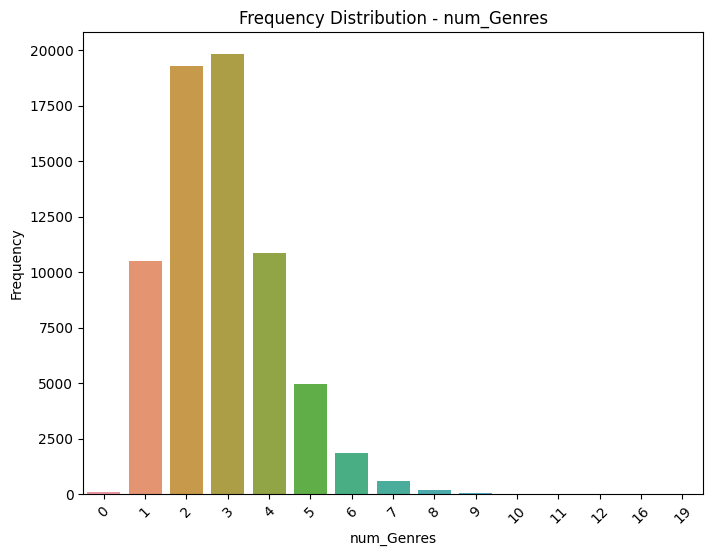

Frequency Analysis - num_Tags :
 num_Tags
20    17255
0     11481
5      3940
3      3597
4      3489
6      3054
7      2528
8      2172
2      2040
9      1873
10     1777
11     1707
13     1632
16     1612
17     1593
12     1565
15     1553
18     1542
14     1542
19     1439
1       638
21      305
Name: count, dtype: int64 



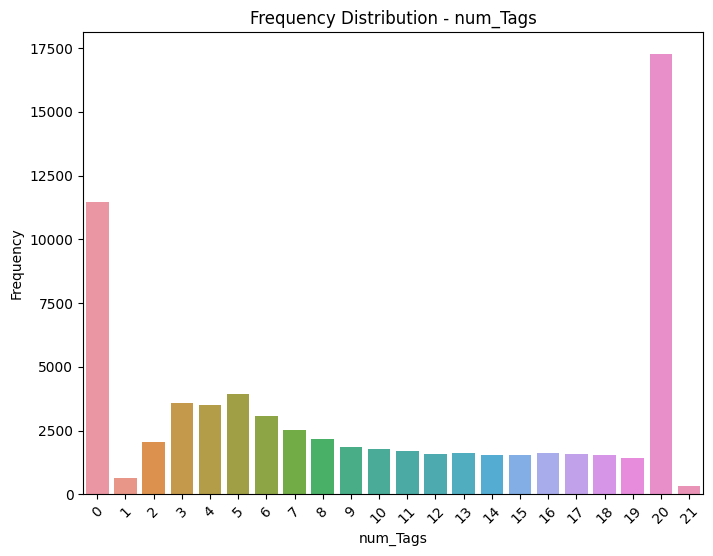

Frequency Analysis - num_Supported languages :
 num_Supported languages
1      39515
2       8828
3       3170
5       2205
4       2173
6       1752
7       1402
8       1363
9       1321
10      1168
11      1040
29       927
12       805
13       592
14       475
15       299
27       244
16       191
103      132
17       125
18       121
26        77
28        70
20        66
19        62
25        45
21        45
23        39
22        37
24        26
37         5
88         2
33         2
101        2
90         1
75         1
92         1
36         1
72         1
32         1
94         1
31         1
Name: count, dtype: int64 



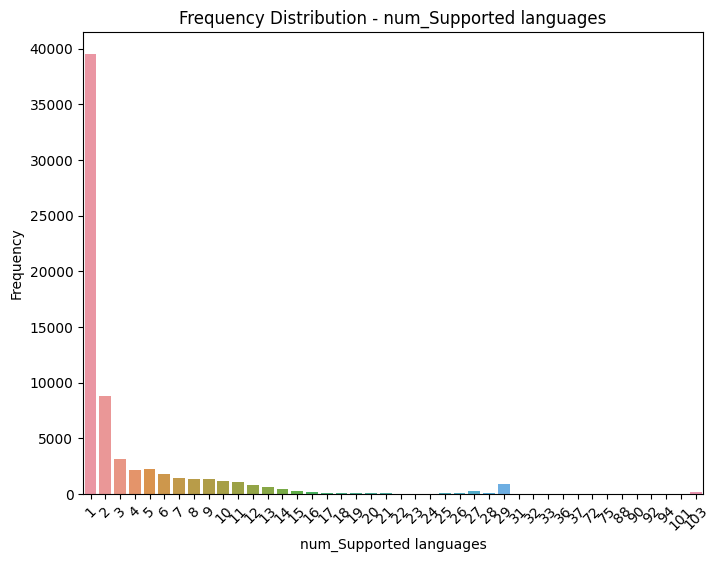

Frequency Analysis - num_Full audio languages :
 num_Full audio languages
0      38405
1      18592
2       7533
3       1158
4        389
29       373
5        324
6        312
7        227
8        166
9        152
10       139
103       90
27        86
13        72
11        71
12        59
14        39
15        32
16        20
28        19
26        16
17        10
20         9
18         7
19         7
22         6
21         5
35         4
25         3
24         2
88         2
23         2
34         1
33         1
37         1
Name: count, dtype: int64 



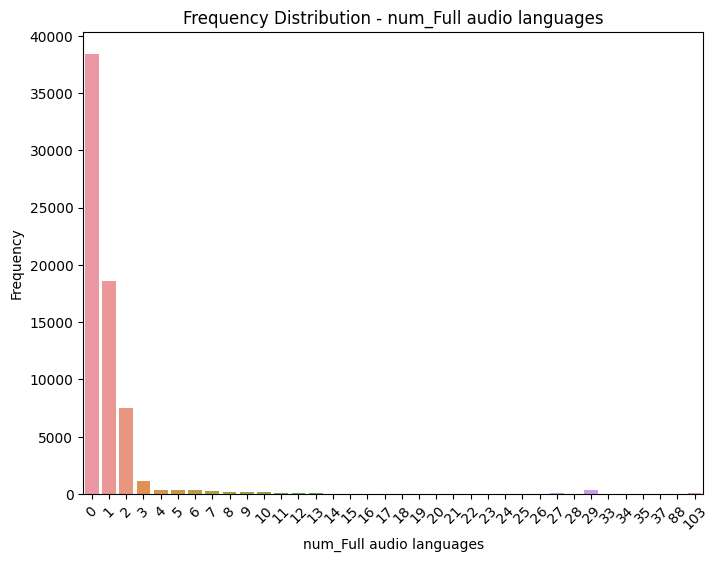

Frequency Analysis - num_Platforms :
 num_Platforms
1    51909
2     8751
3     7674
Name: count, dtype: int64 



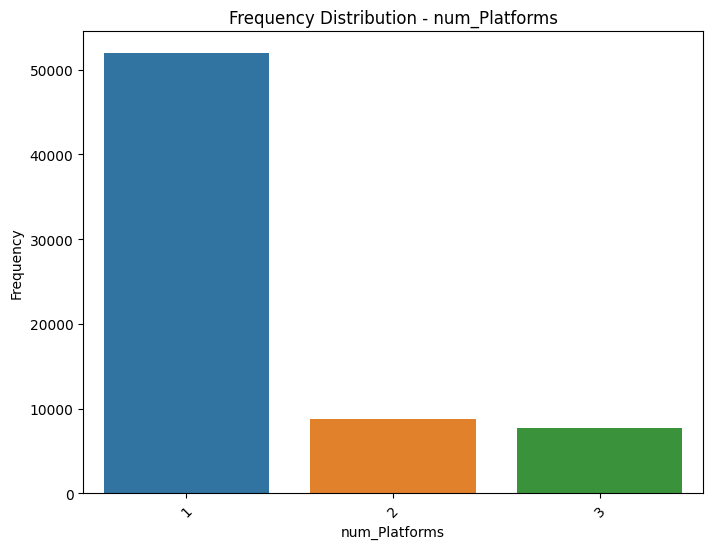

Frequency Analysis - Content_Warning_Indicator :
 Content_Warning_Indicator
0    58038
1    10296
Name: count, dtype: int64 



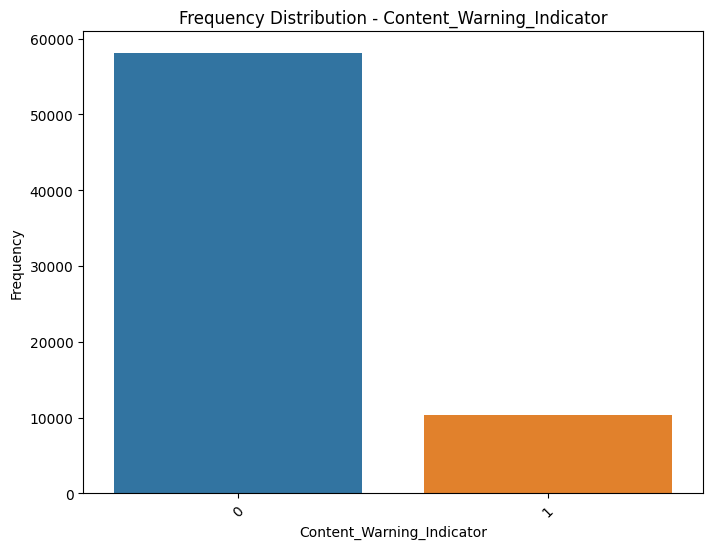

Frequency Analysis - Release by Quarter :
 Release by Quarter
Q4    18293
Q1    17443
Q3    17153
Q2    15445
Name: count, dtype: int64 



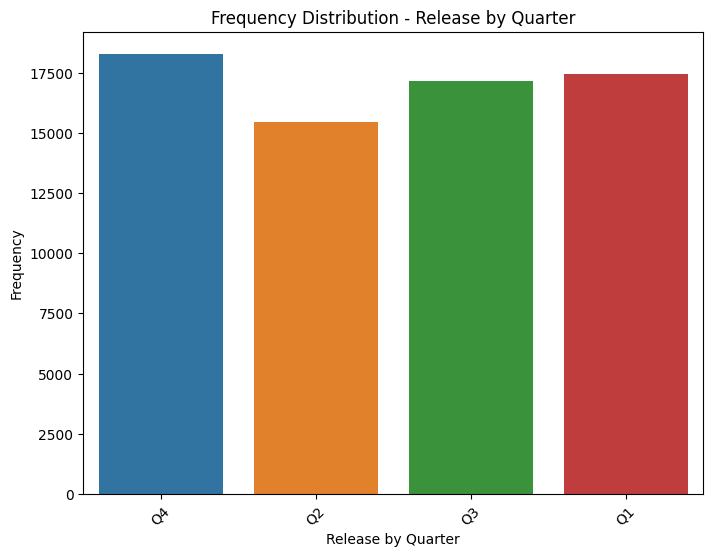

In [157]:
# Create histogram for peak CCU
plt.hist(df["Peak CCU"], bins=10**(np.arange(0,6)))
plt.xlabel('Peak CCU (log)')
plt.ylabel('Frequency')
plt.title('Histogram of Peak CCU (log)')
plt.xscale('log')  # Set x-axis to log scale
plt.show()

# Count the amount of games for each platform
windows_count = (df['Windows'] == 1).sum()
linux_count = (df['Linux'] == 1).sum()
mac_count = (df['Mac'] == 1).sum()

# Create a bar plot
plt.bar(['Windows', 'Linux', 'Mac'], [windows_count, linux_count, mac_count])
plt.title('Amount of games supporting operating system')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

# Extract the year from the 'datetime' column
df['Year'] = df['Release date'].dt.year

# Group by year and calculate the maximum peak CCU
max_peak_ccu_by_year = df.groupby('Year')['Max Peak CCU'].max()

# Drop the intermediate 'Year' column if needed
df.drop('Year', axis=1, inplace=True)

# Create a line plot for max peak CCU by year
plt.plot(max_peak_ccu_by_year.index, max_peak_ccu_by_year.values, marker='o')

# Set plot title and axis labels
plt.title('Max Peak CCU by Year')
plt.xlabel('Year')
plt.ylabel('Max Peak CCU')

# Show the plot
plt.show()

# Specify the columns for frequency analysis
columns_to_analyze = ['Estimated owners', 'Price range', 'Required age', 'num_Publishers', 'num_Categories', 'Has_English',
                      'num_Genres', 'num_Tags', 'num_Supported languages', 'num_Full audio languages',
                      'num_Platforms', 'Content_Warning_Indicator', 'Release by Quarter']

# Perform frequency analysis for each column
for column in columns_to_analyze:
    # Frequency analysis
    freq_counts = df[column].value_counts()
    print("Frequency Analysis -", column, ":\n", freq_counts, "\n")

    # Plot the frequency distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title("Frequency Distribution - " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

### Analyzing Release Frequency by Year and Quarter

We'll analyze the frequency of game releases based on the year and quarter they were released. The data will be presented in a line plot, which shows how the release frequency changes over different quarters.

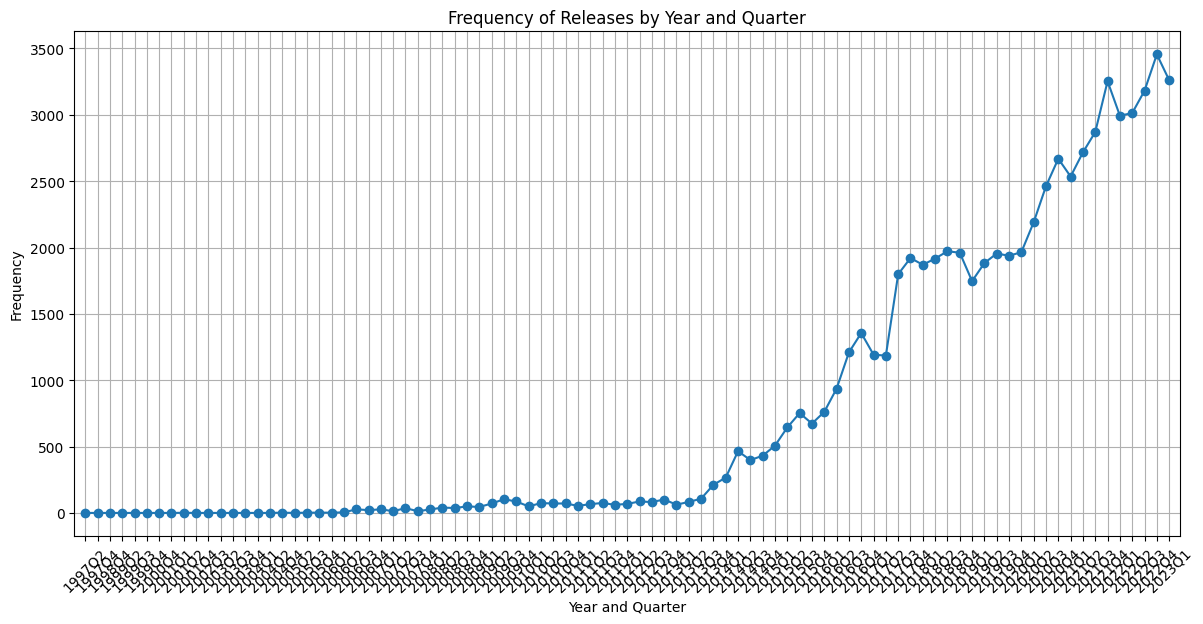

In [158]:
# Group by year and quarter and calculate the frequency
freq_data = df['Release by Year and Quarter'].value_counts().sort_index()

# Filter out the second quarter of 2023 from the data for plotting
filtered_freq_data = freq_data[freq_data.index != pd.Period('2023Q2')]

# Convert Period values to strings
x_values = [str(period) for period in filtered_freq_data.index]

# Create a line plot of the frequency
plt.figure(figsize=(12, 6))
plt.plot(x_values, filtered_freq_data.values, marker='o', linestyle='-')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.title('Frequency of Releases by Year and Quarter')
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()
plt.xticks(rotation=45)
# Get the minimum and maximum x-axis values
x_min, x_max = x_values[0], x_values[-1]

# Calculate the data range
data_range = x_values.index(x_max) - x_values.index(x_min)

# Calculate the padding (1% of the data range)
padding = 0.01 * data_range

# Set the x-axis limits with padding
plt.xlim(x_values.index(x_min) - padding, x_values.index(x_max) + padding)
plt.show()

### Function to Get Top N Frequent Values as Dummy Variables

A helper function that takes a column of data from the DataFrame and returns the top N frequent values as dummy variables. It also calculates the count of values that are not in the top N.

In [159]:
def get_top_n_frequent(column, n=20):
    unique_values = set()
    for value in df[column]:
        if isinstance(value, str):
            unique_values.update(value.split(','))

    value_counts = {}
    for value in unique_values:
        value_counts[value] = df[column].astype(str).str.contains(value, regex=False).sum()

    sorted_values = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)
    top_n_values = dict(sorted_values[:n])
    
    dummy_df = pd.DataFrame()
    # Create dummy variables for the top values and concatenate them to the dummy DataFrame
    for value in top_n_values:
        dummy_var = df[column].astype(str).str.contains(value, regex=False).astype('int32')
        dummy_df[column + '_' + value] = dummy_var

    # Calculate the total count of values not in the top n
    other_count = sum(value[1] for value in sorted_values[n:])

    return top_n_values, other_count, dummy_df

### Function to Create a Bar Chart for a Column

A helper function that takes a column of data from the DataFrame and creates a bar chart to visualize the top N most frequent values in the column. The function also returns a DataFrame with dummy variables for the top N values.

In [160]:
# Function to create a plot for a column
def create_bar_chart(column, n=20):
    # Get the top n most frequent values in the column
    top_values, other_count, dummy_df = get_top_n_frequent(column, n)

    # Add the "Other" category with its count
    top_values['Other'] = other_count

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    x = list(top_values.keys())
    y = list(top_values.values())
    x_pos = np.arange(len(x))

    # Create the bar plot
    bars = plt.bar(x_pos, y)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Most Frequent {column}')

    # Adjust the position and alignment of x-ticks
    plt.xticks(x_pos, x, rotation=45, ha='right')

    # Add labels on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return dummy_df

### Creating Plots and Adding Dummy Variables

The following code creates bar plots and adds dummy variables for the columns 'Categories', 'Tags', and 'Genres'. It also calculates the total count of unique values for each of these columns. 

Please note that the same process can be applied to 'Publishers' and 'Developers' as well.

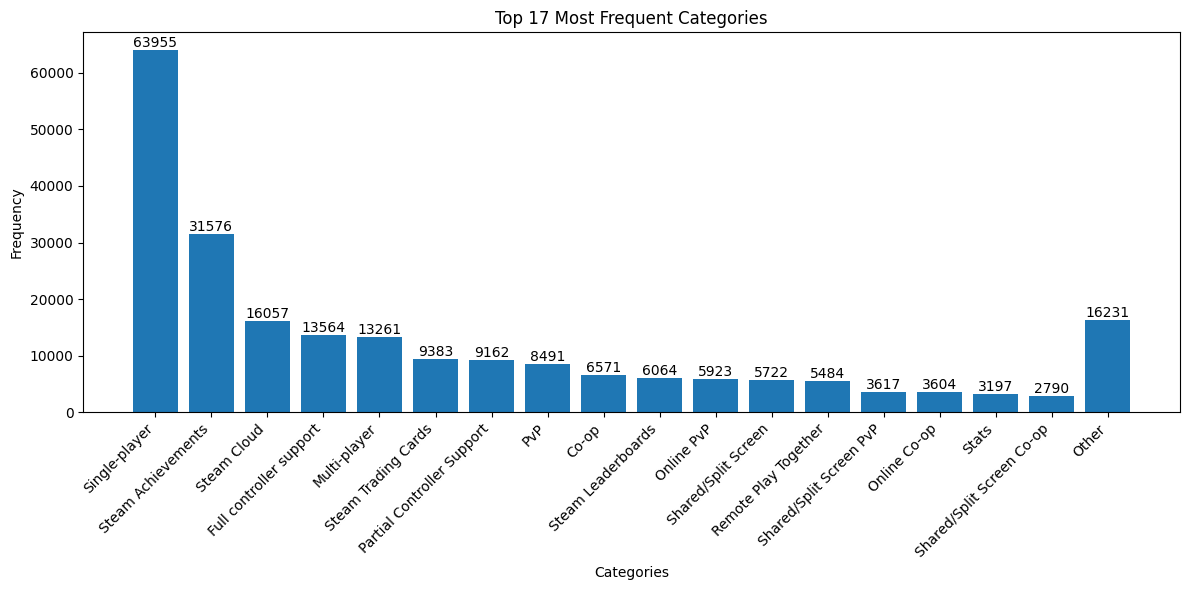

Total unique Categories: 41


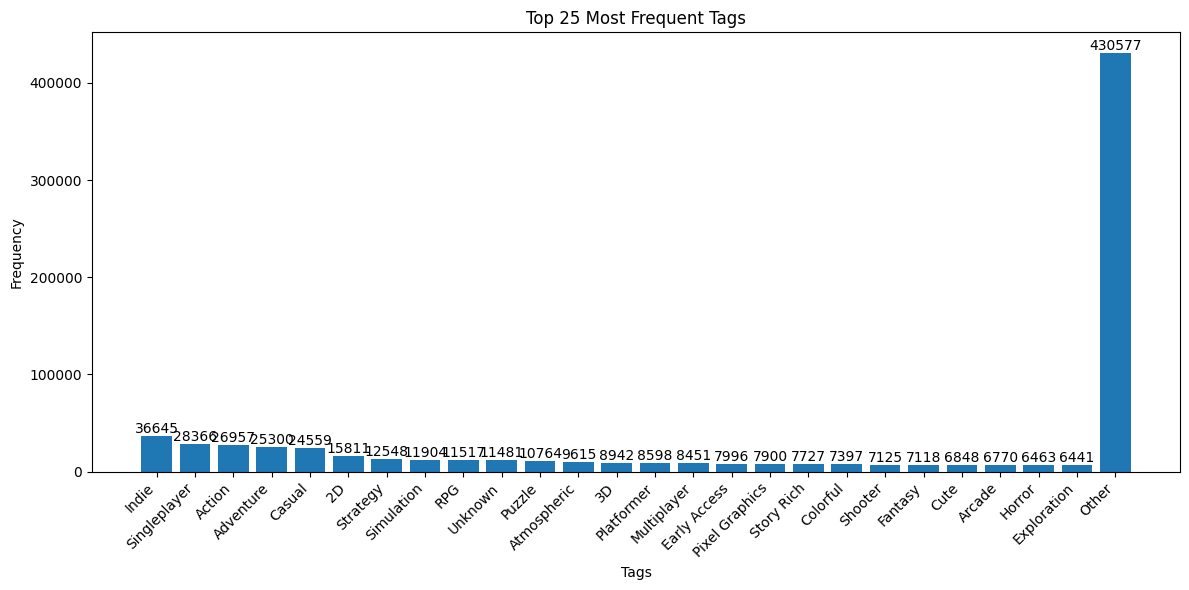

Total unique Tags: 445


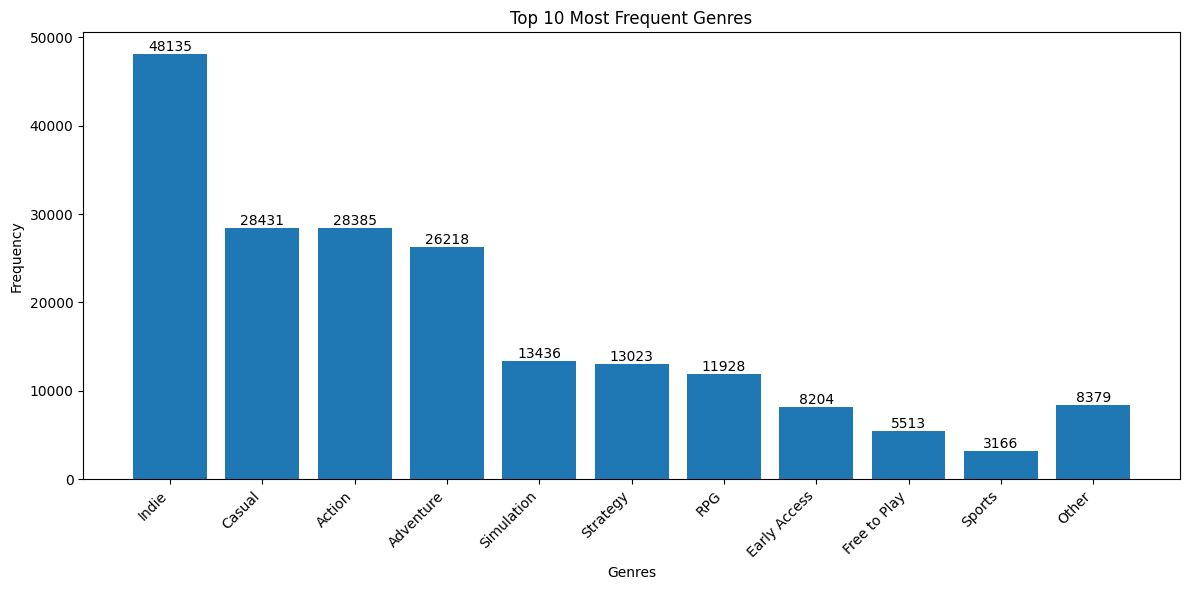

Total unique Genres: 34


In [161]:
# Create plots for 'Categories, 'Tags', 'Genres', 'Developers', and 'Publishers'
columns = [('Categories', 17), ('Tags', 25), ('Genres', 10)]
columns_not_done = ['Publishers', 'Developers']
for column, n in columns:
    dummy_df = create_bar_chart(column, n)
    
    # Concatenate the original DataFrame with the dummy DataFrame
    df = pd.concat([df, dummy_df], axis=1)

    # Calculate the total count for the column
    total_count = len(set(','.join(df[column].astype(str)).split(',')))
    print(f"Total unique {column}: {total_count}")

## Save the Dataset

To make it easier to keep working, we save the dataset using the `pd.to_csv()` function from the Pandas library.

In [162]:
# Save to reduced csv
df.to_csv('games_reduced_dummies.csv', index=False)

## Categorical Features Encoding and Cleaning

The following code performs encoding categorical features and preparing the data for training.

#### Dropped Columns:
1. **Name**: The name of the game. Since names are unique identifiers and not directly useful for modeling, it's dropped.
2. **Release date**: The date when the game was released. While time-related information can be important, the specific date itself may not directly impact the model's prediction, so it's dropped.
3. **Release by Year and Quarter**: This column contains the year and quarter in which the game was released. It's encoded to represent each year and quarter separately using one-hot encoding.
4. **Supported languages**: The languages the game supports.
5. **Full audio languages**: Similar to supported languages, this column is dropped as well.
6. **Developers**: The game developers' names. Since names are unique identifiers and not directly useful for modeling, it's dropped.
7. **Publishers**: The game publishers' names. Similar to 'developers'.
8. **Categories**: Categories the game belongs to. This could include genres or themes. Similar to 'developers'.
9. **Genres**: Specific genres the game falls under. Similar to 'developers'.
10. **Tags**: Tags associated with the game. Similar to categories and genres. Similar to 'developers'.
11. **Estimated owners**: This column contains information about the estimated number of game owners. Since it has been encoded earlier using one-hot encoding, it's no longer needed in its original form. Therefore, it's dropped to avoid redundancy.
12. **Price range**: This column has been encoded using one-hot encoding to represent different price range categories. The encoded columns have captured this information more effectively, so the original column is dropped.

In [163]:
# Drop categorical features
categorical_features = ['Name', 'Release date', 'Release by Year and Quarter','Supported languages', 'Full audio languages','Developers', 'Publishers', 'Categories', 'Genres', 'Tags']

df = df.drop(columns=categorical_features)

# Create one-hot encoding for Estimated owners
estimated_owners_encoded = pd.get_dummies(df['Estimated owners'], prefix='EstimatedOwners').astype('int32')

# Create one-hot encoding for Price range
price_range_encoded = pd.get_dummies(df['Price range'], prefix='PriceRange').astype('int32')

# Create one-hot encoding for Release by Quarter
release_quarter_encoded = pd.get_dummies(df['Release by Quarter'], prefix='ReleaseQuarter').astype('int32')

# Concatenate the encoded columns to the original DataFrame
df = pd.concat([df, estimated_owners_encoded, price_range_encoded, release_quarter_encoded], axis=1)

# Drop the original columns
df.drop(['Estimated owners', 'Price range', 'Release by Quarter'], axis=1, inplace=True)

### Preprocessing Numeric Features and Handling Outliers:
In this section, the numeric features in the DataFrame are preprocessed, and outliers are identified and visualized using box plots. Outliers are data points that significantly deviate from the rest of the data and might have a negative impact on model performance. 

Here is the explenation for the numerical features checked:

1. **Required age**: The age rating required to play the game. Indicates the minimum age recommended by the game developer.
2. **Price_(usd)**: The price of the game in USD. Represents the cost of purchasing the game.
3. **Metacritic score**: The Metacritic score of the game. Aggregates reviews from various sources to provide an overall score indicating the game's critical reception.
4. **User score**: The user score of the game. Represents user-generated reviews and ratings.
5. **Positive**: The count of positive reviews for the game. Indicates the number of favorable user reviews.
6. **Negative**: The count of negative reviews for the game. Indicates the number of unfavorable user reviews.
7. **Achievements**: The number of achievements available in the game. In-game accomplishments that players can earn.
8. **Recommendations**: The number of user recommendations for the game. Indicates the number of players who recommend the game to others.
9. **Average playtime forever**: The average playtime of the game (in minutes) for all players.
10. **Average playtime two weeks**: The average playtime of the game (in minutes) for players within a two-week period.
11. **Median playtime forever**: The median playtime of the game (in minutes) for all players. The median represents the middle value in a distribution.
12. **Median playtime two weeks**: The median playtime of the game (in minutes) for players within a two-week period.
13. **UNIX_Release_date**: The release date of the game in UNIX timestamp format. UNIX timestamps represent dates as seconds since January 1, 1970.
14. **Max Peak CCU**: The maximum peak concurrent players (CCU) for the game. CCU represents the highest number of players online simultaneously.
15. **num_Publishers**: The count of publishers associated with the game.
16. **num_Categories**: The count of categories that the game belongs to.
17. **num_Genres**: The count of genres that the game falls under.
18. **num_Tags**: The count of tags associated with the game.
19. **num_Supported languages**: The count of languages supported by the game.
20. **num_Full audio languages**: The count of languages with full audio support in the game.
21. **num_Platforms**: The count of platforms the game supports (e.g., Windows, Linux, Mac).
22. **Review Ratio**: The ratio of positive reviews to the total number of reviews (positive and negative). Represents the overall sentiment of reviews.
23. **Price per Avg Playtime Forever**: The ratio of the game's price to the average playtime forever. Measures price efficiency based on playtime.
24. **Price per Avg Playtime Two Weeks**: The ratio of the game's price to the average playtime over a two-week period. Measures price efficiency in a short timeframe.
25. **Price per Median Playtime Forever**: The ratio of the game's price to the median playtime forever. Measures price efficiency based on playtime.
26. **Price per Median Playtime Two Weeks**: The ratio of the game's price to the median playtime over a two-week period. Measures price efficiency in a short timeframe.

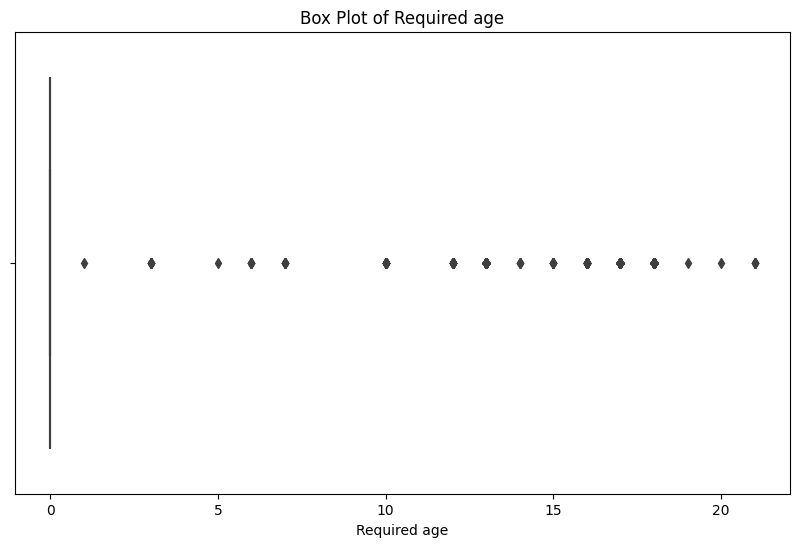

Number of outliers in 'Required age': 1427


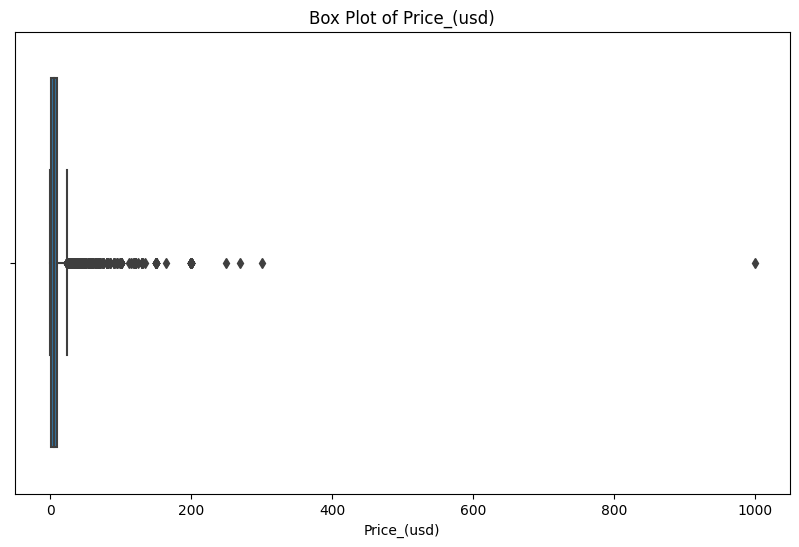

Number of outliers in 'Price_(usd)': 3295


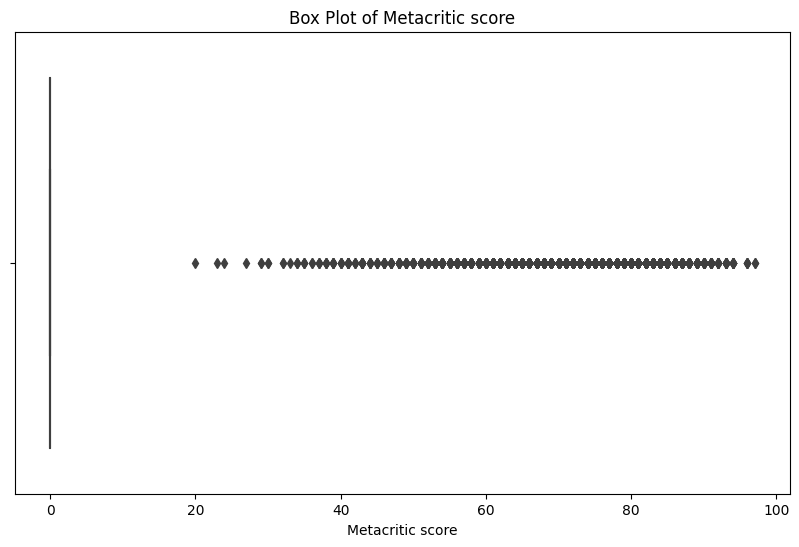

Number of outliers in 'Metacritic score': 3636


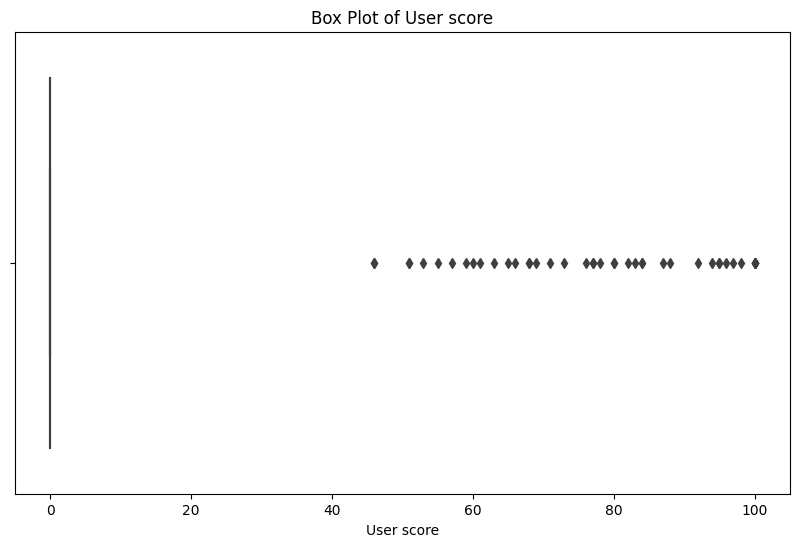

Number of outliers in 'User score': 42


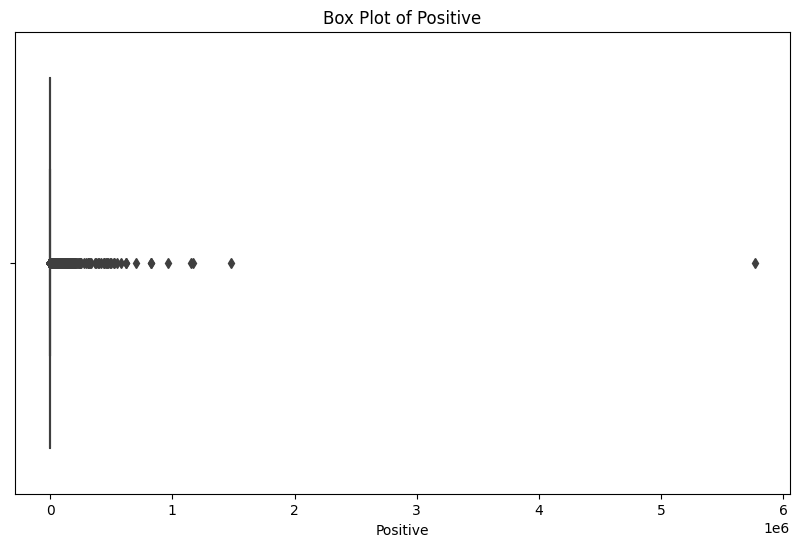

Number of outliers in 'Positive': 11557


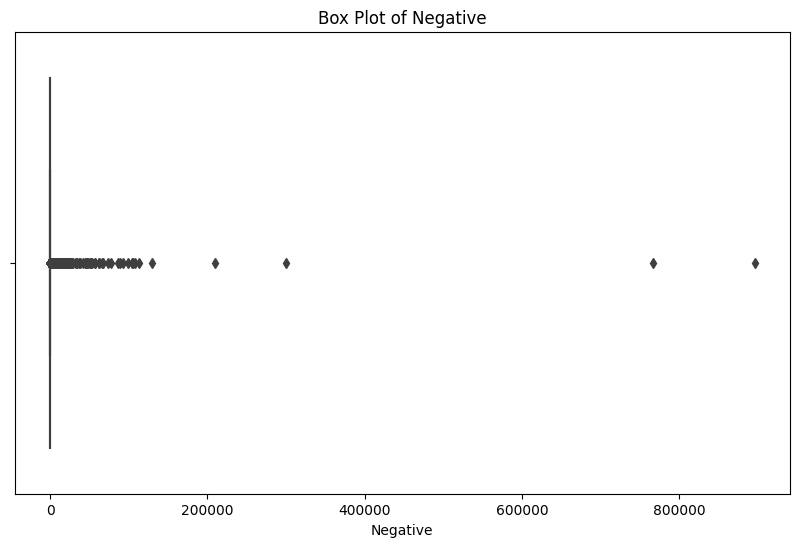

Number of outliers in 'Negative': 10967


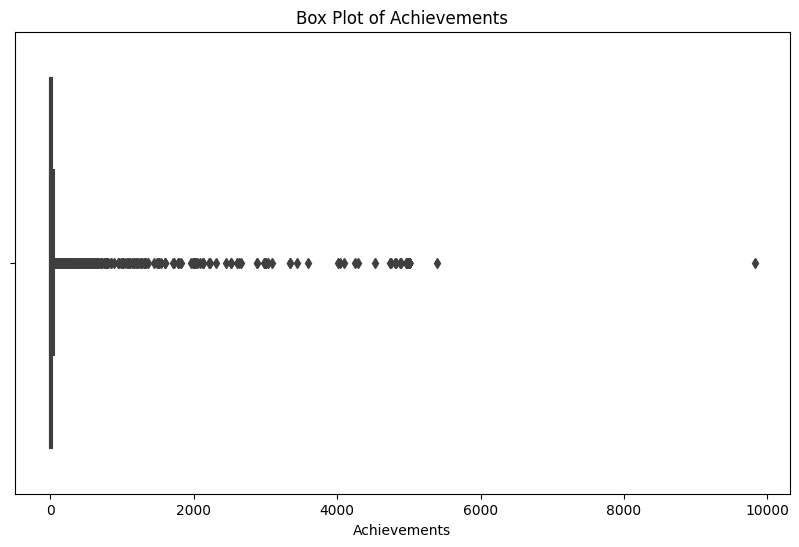

Number of outliers in 'Achievements': 4099


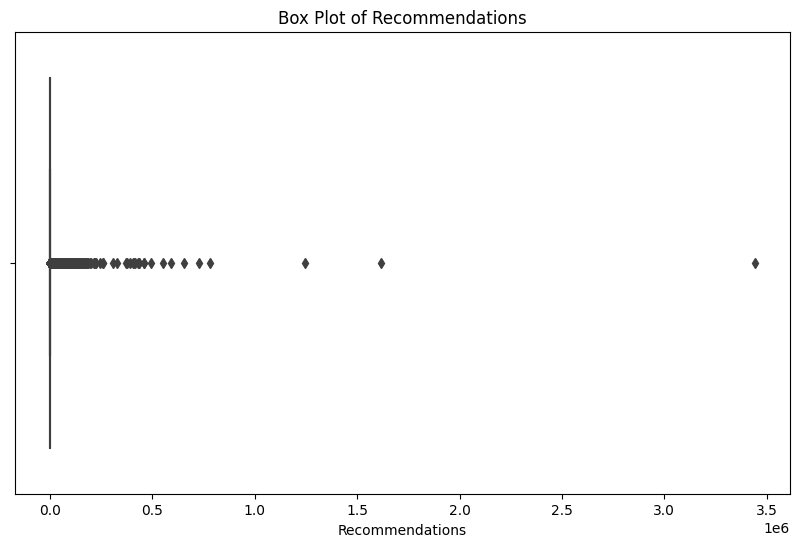

Number of outliers in 'Recommendations': 12597


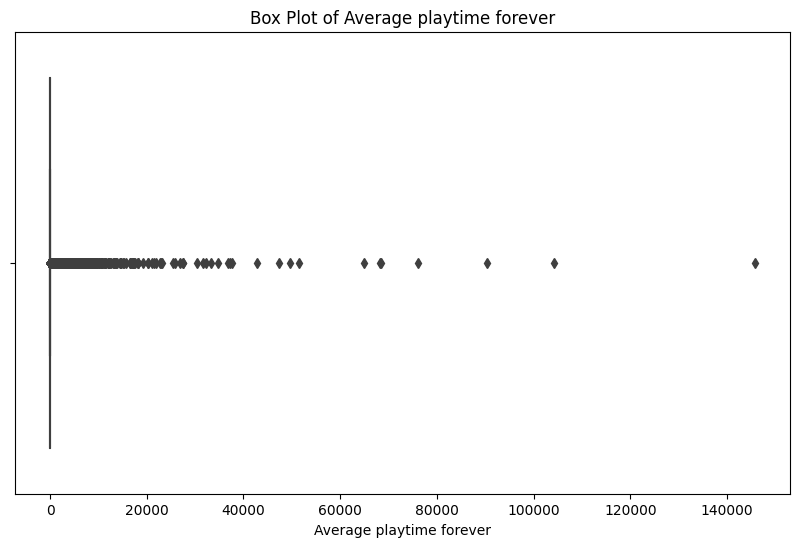

Number of outliers in 'Average playtime forever': 14147


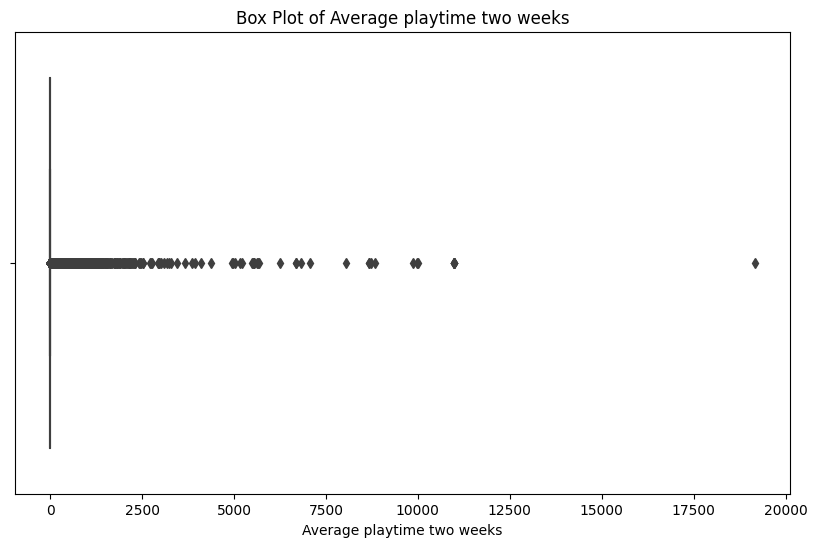

Number of outliers in 'Average playtime two weeks': 1819


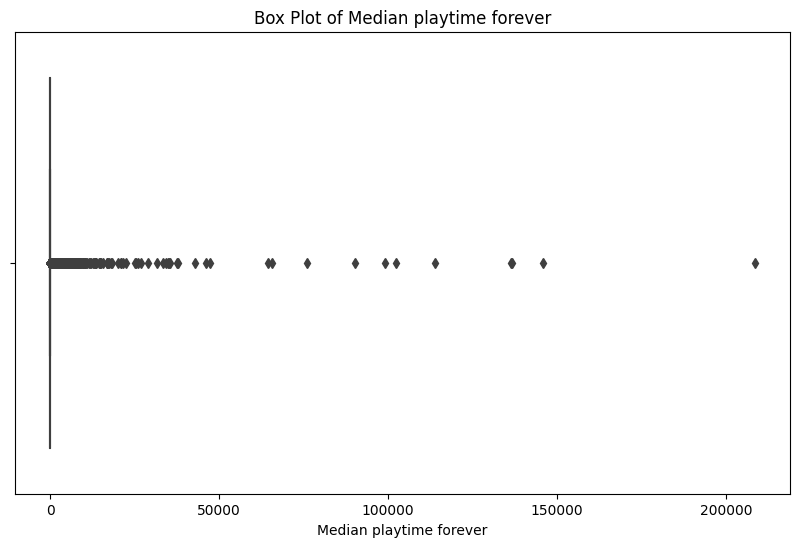

Number of outliers in 'Median playtime forever': 14147


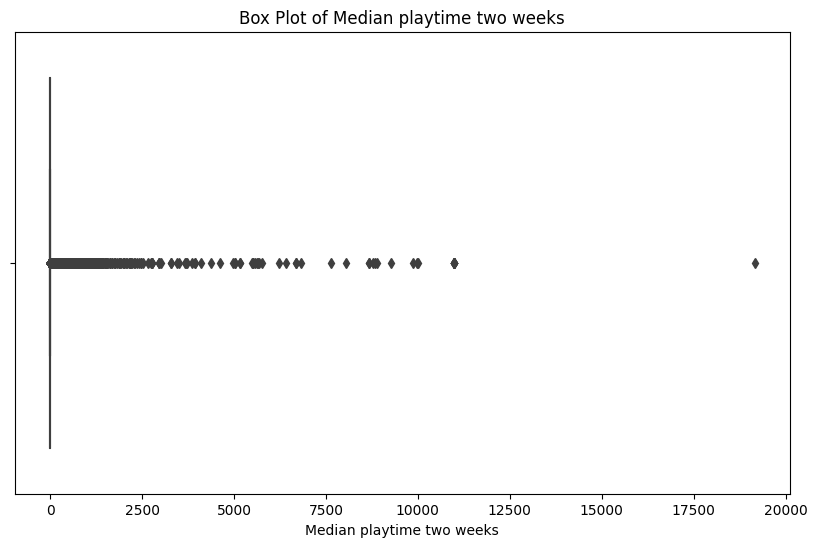

Number of outliers in 'Median playtime two weeks': 1819


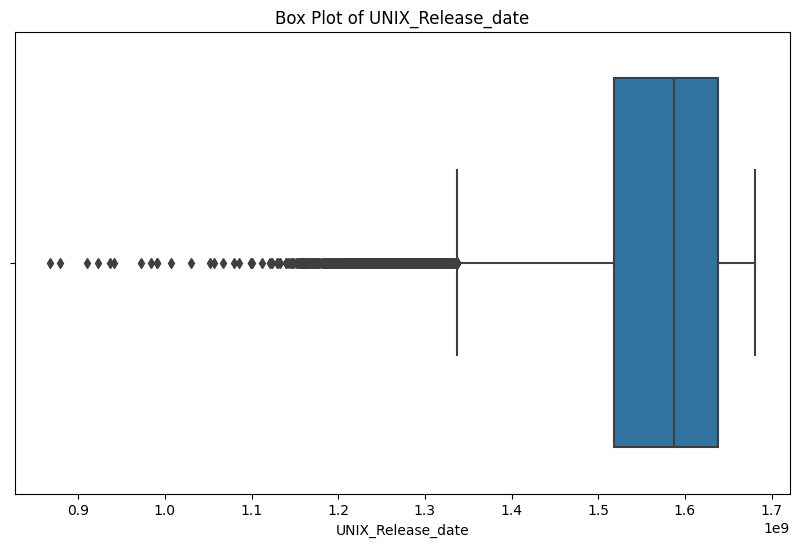

Number of outliers in 'UNIX_Release_date': 1292


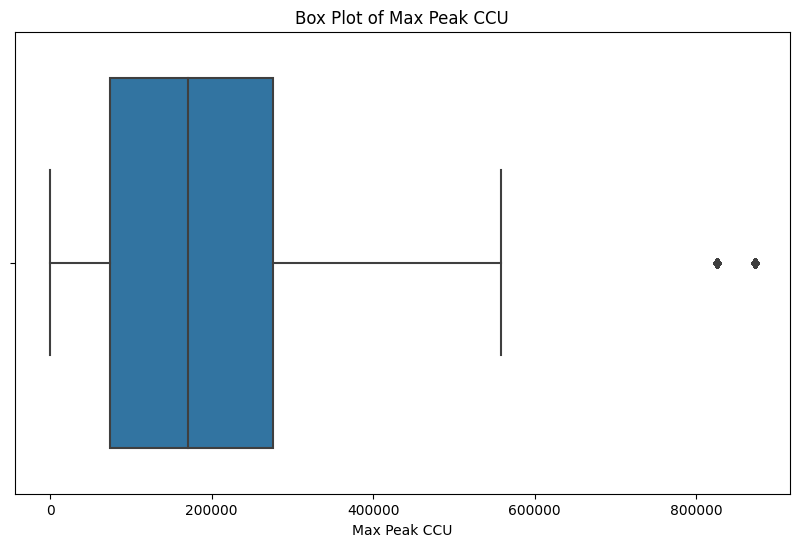

Number of outliers in 'Max Peak CCU': 3641


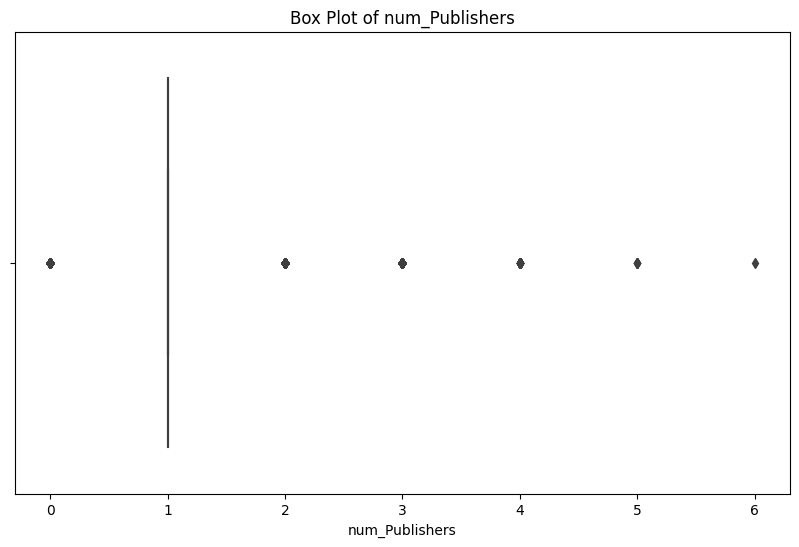

Number of outliers in 'num_Publishers': 4384


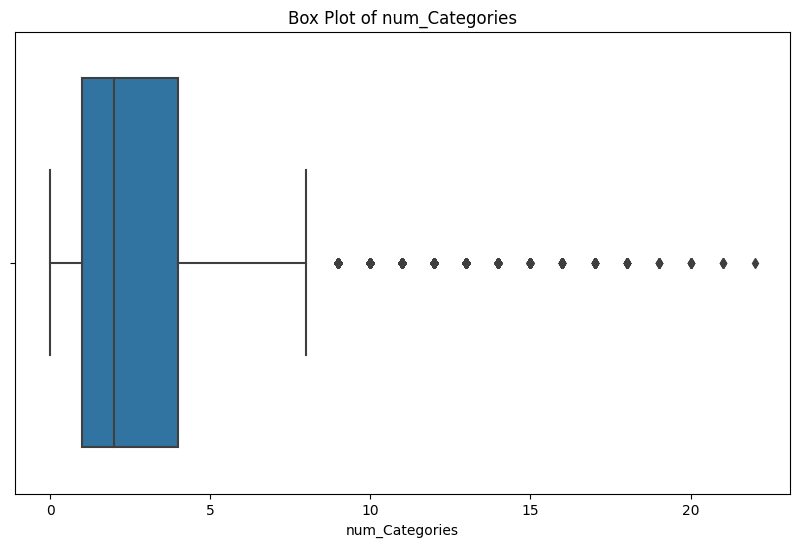

Number of outliers in 'num_Categories': 4116


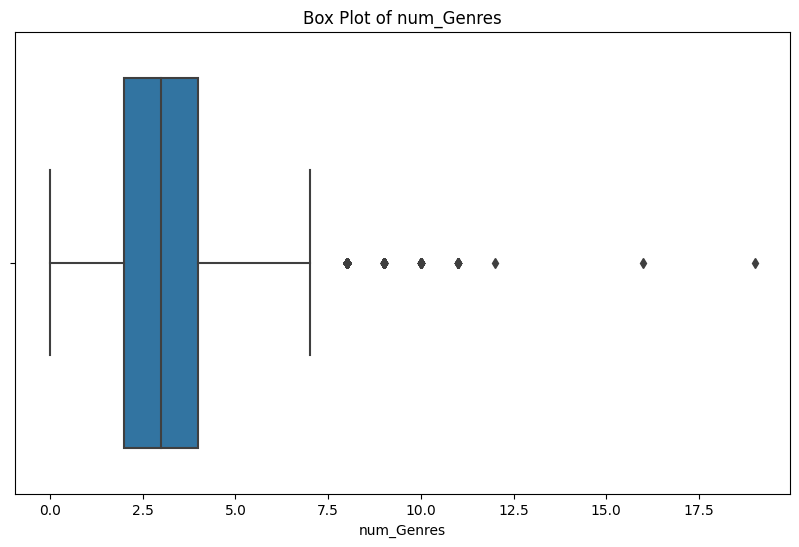

Number of outliers in 'num_Genres': 297


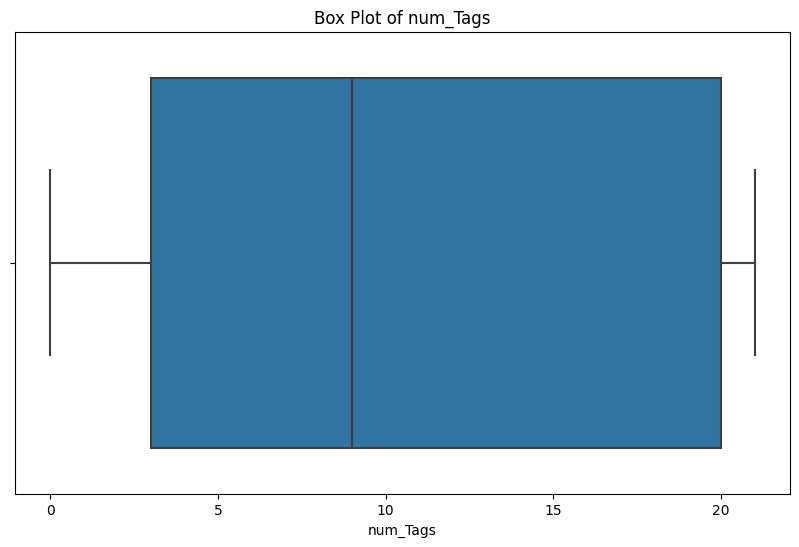

Number of outliers in 'num_Tags': 0


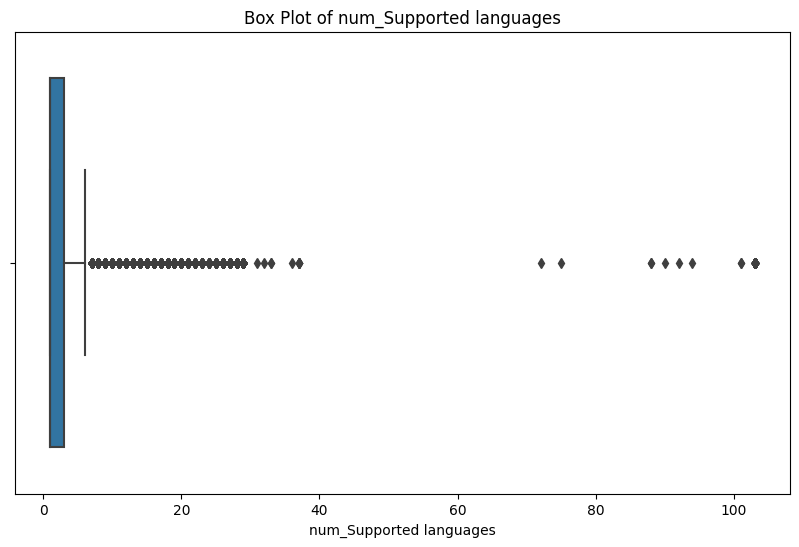

Number of outliers in 'num_Supported languages': 10691


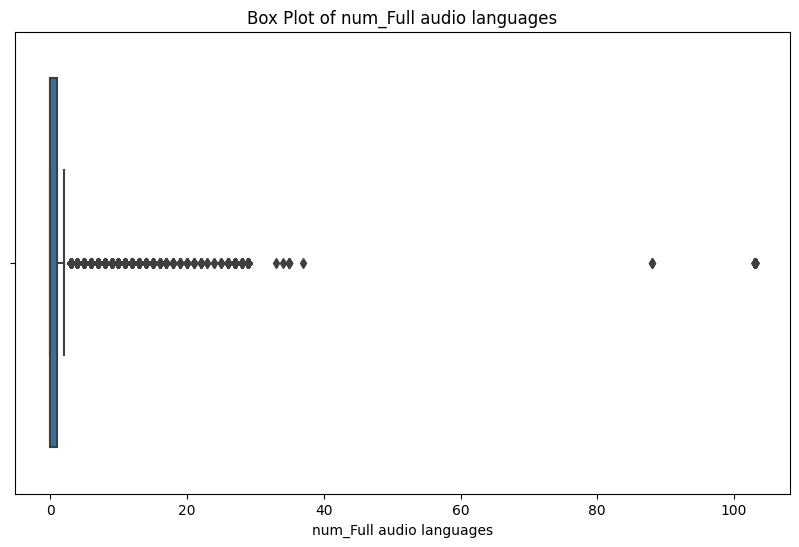

Number of outliers in 'num_Full audio languages': 3804


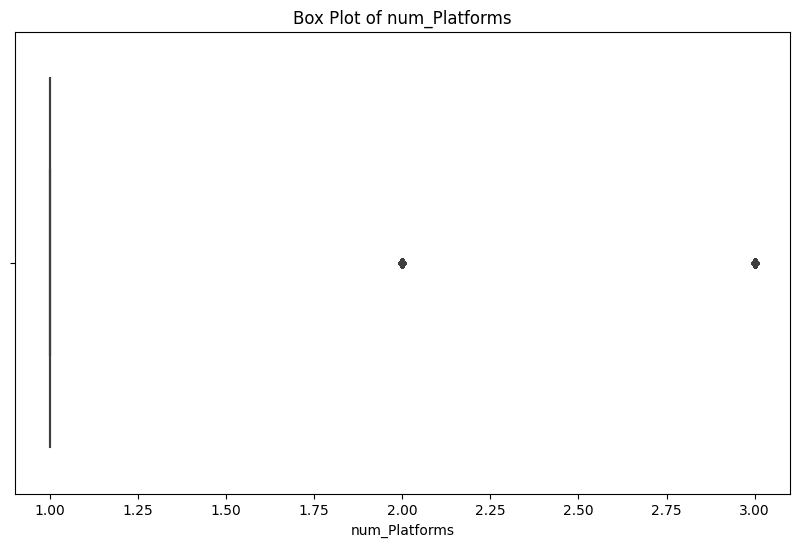

Number of outliers in 'num_Platforms': 16425


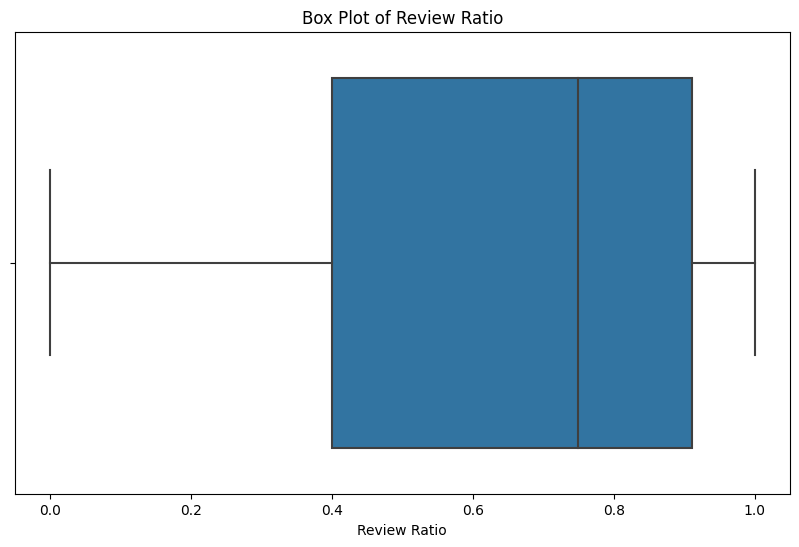

Number of outliers in 'Review Ratio': 0


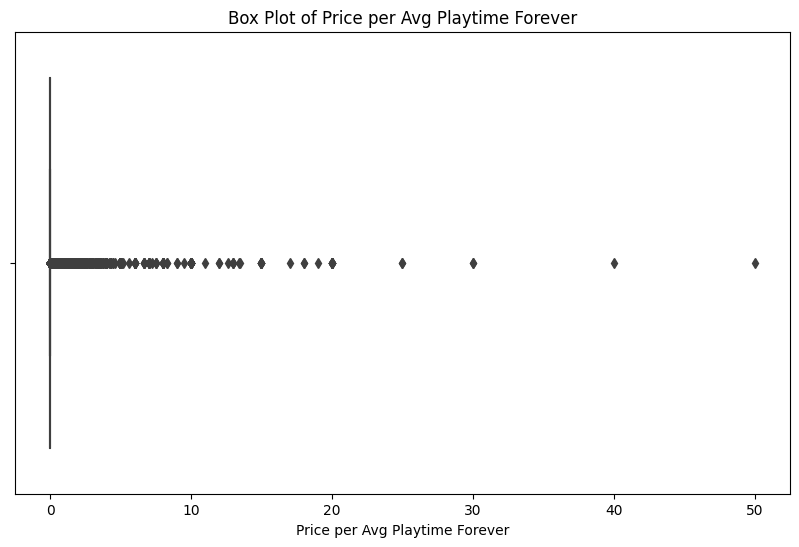

Number of outliers in 'Price per Avg Playtime Forever': 12273


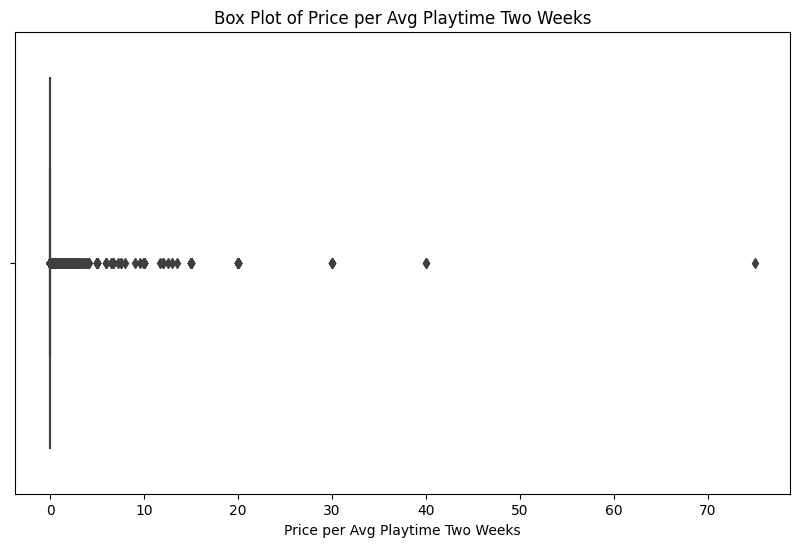

Number of outliers in 'Price per Avg Playtime Two Weeks': 1597


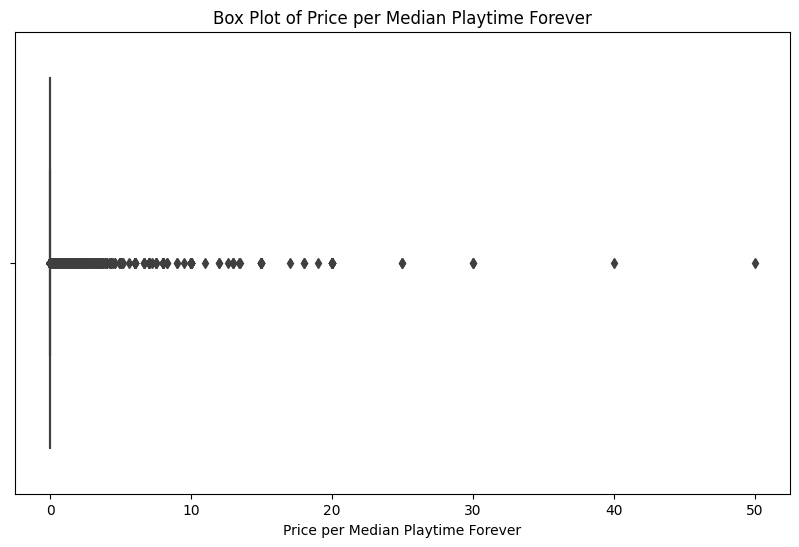

Number of outliers in 'Price per Median Playtime Forever': 12273


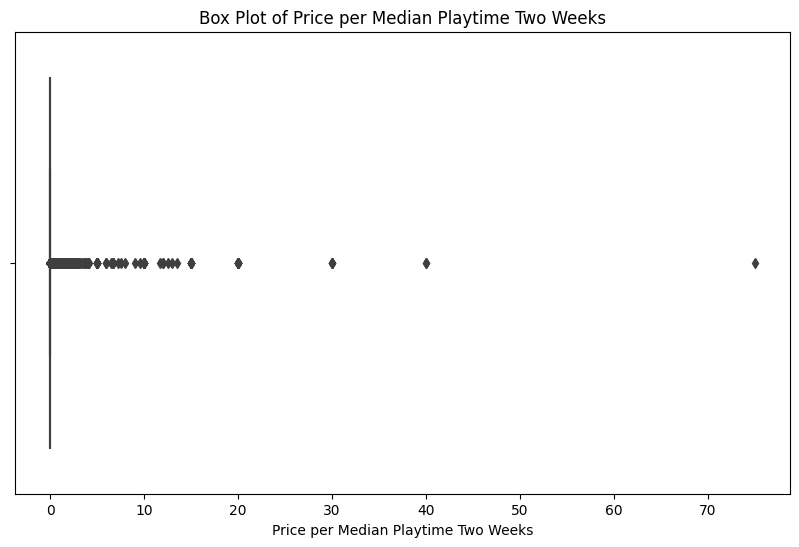

Number of outliers in 'Price per Median Playtime Two Weeks': 1597


In [164]:

# Preprocessing numeric features
numeric_features = ['Required age', 'Price_(usd)', 'Metacritic score', 'User score', 'Positive',
                    'Negative', 'Achievements', 'Recommendations', 'Average playtime forever',
                    'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks',
                    'UNIX_Release_date', 'Max Peak CCU', 'num_Publishers', 'num_Categories', 'num_Genres', 'num_Tags',
                    'num_Supported languages', 'num_Full audio languages', 'num_Platforms',
                    'Review Ratio', 'Price per Avg Playtime Forever', 'Price per Avg Playtime Two Weeks',
                    'Price per Median Playtime Forever', 'Price per Median Playtime Two Weeks']

# Iterate over numerical columns
for column in numeric_features:
    # Calculate quartiles and interquartile range (IQR)
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1

    # Define the outlier boundaries
    lower_bound = quartile1 - 1.5 * iqr
    upper_bound = quartile3 + 1.5 * iqr

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Visualize outliers using a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in '{column}': {num_outliers}")

## Save the Dataset

To make it easier to keep working, we save the dataset using the `pd.to_csv()` function from the Pandas library.

In [165]:
# Save to reduced csv
df.to_csv('games_reduced_dummies.csv', index=False)

## Data Preparation and Model Training

In this code snippet, we're preparing the data and training several regression models to predict the 'Peak CCU' (Peak Concurrent Users) variable.

1. **Splitting the Dataset:**
   We start by splitting the dataset into features (X) and the target variable (y). The 'Peak CCU' column is used as the target variable (`y`), and all other columns are used as features (`X`).

2. **Train-Test Split:**
   The dataset is further divided into training and testing sets using the `train_test_split` function from scikit-learn. The test size is set to 30% of the data, and a random seed of 42 is used for reproducibility.

3. **Standard Scaling and Preprocessing:**
   We create a `StandardScaler` instance to standardize the numeric features. The `ColumnTransformer` is used to apply the scaler to the specified numeric features (`numeric_features`) while leaving other features unchanged.

4. **Applying Preprocessing:**
   The preprocessing steps are applied separately to the training set (`X_train`) and testing set (`X_test`). The transformed data is then converted back to pandas DataFrames with appropriate column names.

5. **Initializing and Training Models:**
   We initialize four regression models:
   - Linear Regression (`lr`)
   - Lasso Regression (`lasso`)
   - Random Forest Regression (`rf`)
   - XGBoost Regression (`xb`)
   
   <br>

 6. **Model Training and Prediction:**
   For each model, we fit the model to the training data (`X_train`, `y_train`) using the `fit` method. Then, we use the trained models to make predictions on the testing set (`X_test`) and store the predictions in variables (`lr_pred`, `lasso_pred`, `rf_pred`, `xb_pred`).

These trained models can now be used to predict the 'Peak CCU' values for new data and compare their performance in terms of prediction accuracy and other evaluation metrics.


In [167]:
#Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['Peak CCU'])
y = df['Peak CCU']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_transformer = StandardScaler()

# Column Transformer for applying different preprocessing to different feature types
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)], remainder='passthrough')

# Applying preprocessing to the training set
X_train = preprocessor.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns= X.columns)
# Applying preprocessing to the testing set
X_test = preprocessor.transform(X_test)

X_test = pd.DataFrame(X_test, columns= X.columns)

# Initialize models
lr = LinearRegression(n_jobs=-1)
lasso = Lasso()
rf = RandomForestRegressor(n_jobs=-1, n_estimators=400, max_depth = 10, min_samples_split=5)
xb = xgb.XGBRegressor(n_estimators=400, max_depth = 10, n_threads = -1)

# Train and evaluate Linear Regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)

# Train and evaluate Lasso
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred_train = lasso.predict(X_train)

# Train and evaluate Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)

# Train and evaluate XGB
xb.fit(X_train, y_train)
xb_pred=xb.predict(X_test)
xb_pred_train = xb.predict(X_train)

[15:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_threads" } are not used.



## Model Evaluation and Comparison

In this code snippet, we evaluate the performance of different regression models (Linear Regression, Lasso, Random Forest, and XGBoost) using various metrics and visualize the results.

1. **Calculate Metrics:**
   For each regression model, we calculate several evaluation metrics:
   - R-Square (Coefficient of Determination): Indicates the proportion of variance in the target variable that can be explained by the model. Closer to 1 is better.
   - MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower values are better.
   - RMSE (Root Mean Squared Error): Square root of MSE, provides a more interpretable scale.
   - MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values.
   
   <br>

2. **Feature Importance:**
   We also analyze the feature importance for the Random Forest and XGBoost models.
   - For Random Forest, we calculate feature importances using the `feature_importances_` attribute and create a bar plot to visualize the top contributing features.
   - For XGBoost, we retrieve feature importances using the `get_score` method and plot the top features with the highest gain.
   
   <br>
3. **Tabulated Model Comparison:**
   We create a table to compare the evaluation metrics for all four models. The table displays the model names along with their R-Square, MSE, RMSE, and MAE values.
   
4. **Table Visualization:**
   The table is displayed using Matplotlib's `table` function. The data, headers, and styling of the table are defined and configured for visualization.

Overall, this code provides a comprehensive evaluation of the models' performance and allows for a direct comparison of their predictive abilities based on the provided metrics.


lr done
lasso done
rf done
xb done


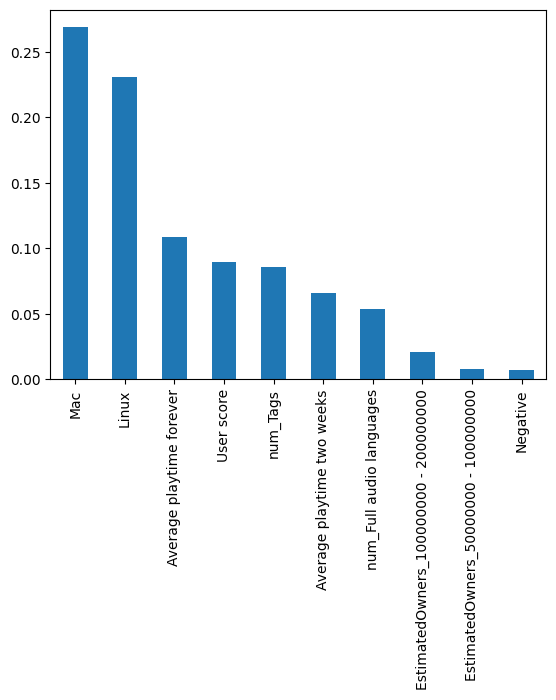

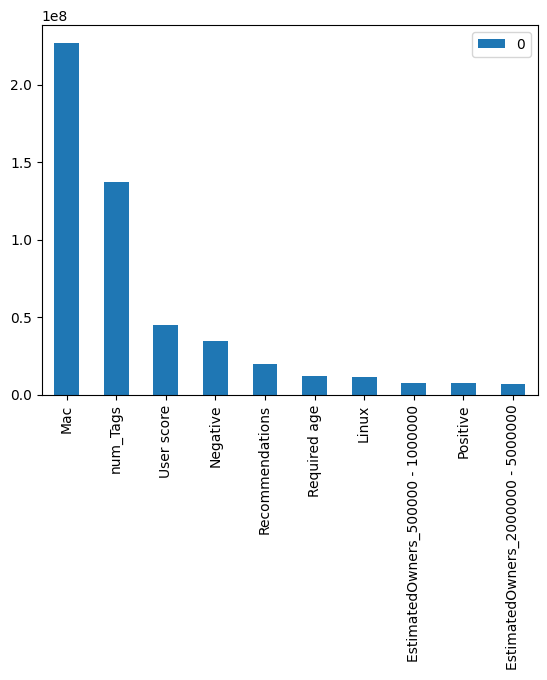

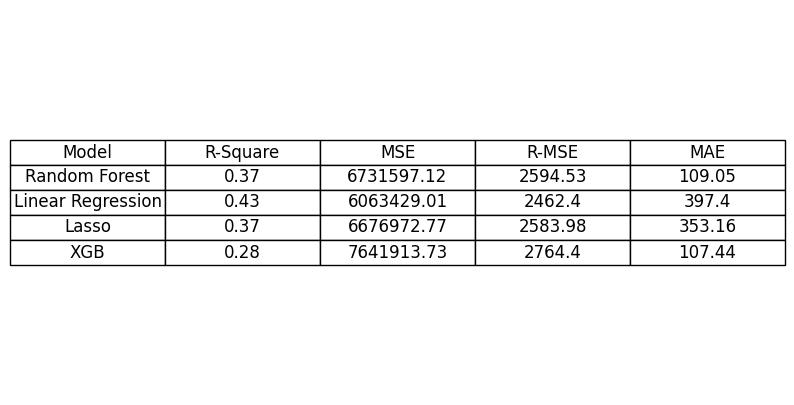

In [175]:
# Calculate Linear Regression metrics
lr_rsqr = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)

# Linear Regression feature importance (coefficients)
lr_feature_importance = lr.coef_
print("lr done")

# Calculate Lasso metrics
lasso_rsqr = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Lasso feature importance (coefficients)
lasso_feature_importance = lasso.coef_
print("lasso done")


# Calculate Random Forest metrics
rf_rsqr = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Random Forest feature importance
rf_feature_importance = rf.feature_importances_
rf_feature_names = X.columns
forest_importances = pd.Series(rf_feature_importance, index=rf_feature_names)

forest_importances.sort_values(ascending=False).head(10).plot(kind='bar')

print("rf done")

# Calculate XGB metrics
xb_rsqr = r2_score(y_test, xb_pred)
xb_mse = mean_squared_error(y_test, xb_pred)
xb_rmse = np.sqrt(xb_mse)
xb_mae = mean_absolute_error(y_test, xb_pred)

xb_feature_importance = xb.get_booster().get_score(importance_type='gain')
x_importances = pd.DataFrame.from_dict(data=xb_feature_importance, orient='index')
x_importances.sort_values(ascending=False, by=0).head(10).plot(kind='bar')
print("xb done")

# Define the data as a list of lists
data = [
    ["Random Forest", rf_rsqr.round(2), rf_mse.round(2), rf_rmse.round(2), rf_mae.round(2)],
    ["Linear Regression", lr_rsqr.round(2), lr_mse.round(2), lr_rmse.round(2), lr_mae.round(2)],
    ["Lasso", lasso_rsqr.round(2), lasso_mse.round(2), lasso_rmse.round(2), lasso_mae.round(2)],
    ["XGB", xb_rsqr.round(2), xb_mse.round(2), xb_rmse.round(2), xb_mae.round(2)]]

# Define the headers for the table
headers = ["Model", "R-Square", "MSE", "R-MSE", "MAE"]

# Create the table plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=data, colLabels=headers, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Display the plot
plt.show()

## Model Performance Metrics on Training Data

In this section, we calculate and display various performance metrics for different regression models using the training data (`y_train` and corresponding predictions) to evaluate how well the models fit the training set.

1. **Calculate Metrics:**
   For each regression model, we calculate several evaluation metrics:
   - R-Square (Coefficient of Determination)
   - MSE (Mean Squared Error)
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
   
   <br>
2. **Tabulated Model Comparison:**
   We create a table to compare the evaluation metrics for all four models. The table displays the model names along with their R-Square, MSE, RMSE, and MAE values.
   
3. **Table Visualization:**
   The table is displayed using Matplotlib's `table` function. The data, headers, and styling of the table are defined and configured for visualization.

This table provides an overview of how well each model performs on the training data, helping you compare the training performance of different models to their testing performance to check for overfitting or underfitting.

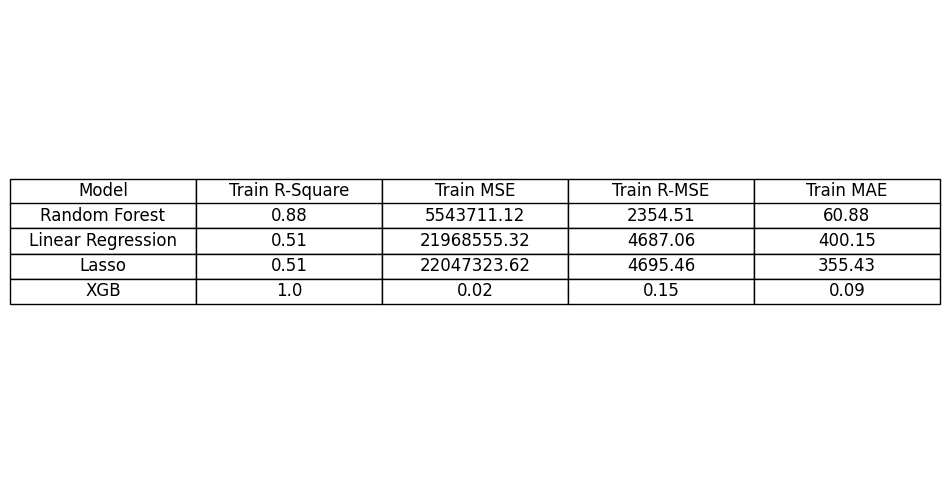

In [170]:
# Calculate Linear Regression metrics for y_train and y_test
lr_rsqr_train = r2_score(y_train, lr_pred_train)
lr_mse_train = mean_squared_error(y_train, lr_pred_train)
lr_rmse_train = np.sqrt(lr_mse_train)
lr_mae_train = mean_absolute_error(y_train, lr_pred_train)

# Calculate Lasso metrics for y_train and y_test
lasso_rsqr_train = r2_score(y_train, lasso_pred_train)
lasso_mse_train = mean_squared_error(y_train, lasso_pred_train)
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_mae_train = mean_absolute_error(y_train, lasso_pred_train)

# Calculate Random Forest metrics for y_train and y_test
rf_rsqr_train = r2_score(y_train, rf_pred_train)
rf_mse_train = mean_squared_error(y_train, rf_pred_train)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)

# Calculate XGB metrics for y_train and y_test
xb_rsqr_train = r2_score(y_train, xb_pred_train)
xb_mse_train = mean_squared_error(y_train, xb_pred_train)
xb_rmse_train = np.sqrt(xb_mse_train)
xb_mae_train = mean_absolute_error(y_train, xb_pred_train)

# Define the data as a list of lists for both y_train and y_test
data = [
    ["Random Forest", rf_rsqr_train.round(2), rf_mse_train.round(2), rf_rmse_train.round(2), rf_mae_train.round(2)],
    ["Linear Regression", lr_rsqr_train.round(2), lr_mse_train.round(2), lr_rmse_train.round(2), lr_mae_train.round(2)],
    ["Lasso", lasso_rsqr_train.round(2), lasso_mse_train.round(2), lasso_rmse_train.round(2), lasso_mae_train.round(2)],
    ["XGB", xb_rsqr_train.round(2), xb_mse_train.round(2), xb_rmse_train.round(2), xb_mae_train.round(2)]]

# Define the headers for the table including y_train and y_test labels
headers = ["Model", "Train R-Square", "Train MSE", "Train R-MSE", "Train MAE"]

# Create the table plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
table = ax.table(cellText=data, colLabels=headers, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Display the plot
plt.show()

## Model Learning Curves and Cross-Validation

In this section, we visualize the learning curves for each model and perform cross-validation to assess their performance.

1. **Model Learning Curves:**
   For each model, we plot the learning curve. A learning curve illustrates how a model's performance (such as the mean squared error) changes as the size of the training dataset increases. It helps us understand if the model is underfitting or overfitting.
   - The x-axis represents the number of training samples.
   - The y-axis represents the mean squared error (or other performance metric).
   - The learning curve provides insights into whether the model would benefit from more training data.
   
   <br>

2. **Cross-Validation and CV Scores:**
   For each model, we perform cross-validation using the `cross_val_score` function. Cross-validation divides the training data into multiple subsets (folds) and trains/evaluates the model on each fold. This helps estimate the model's generalization performance on unseen data.
   - We use the negative mean squared error (`neg_mean_squared_error`) as the scoring metric. By convention, lower values are better.
   - The `-` sign is used to ensure positive values for presentation.
   - Cross-validation scores are calculated for each fold and model.
   
   <br>

3. **Displaying Learning Curves and Cross-Validation Scores:**
   - We use the `plot_learning_curve` function to plot the learning curves for each model. The plots show how the model's performance changes with training set size. The curve's behavior helps us assess bias and variance in the model.
   - After plotting the learning curve, we display the cross-validation scores and their mean for each model. The mean CV score provides a summarized view of how well the model generalizes across different folds.
   
   <br>

Keep in mind that learning curves and cross-validation help you understand the model's performance characteristics, assisting in model selection and tuning decisions.


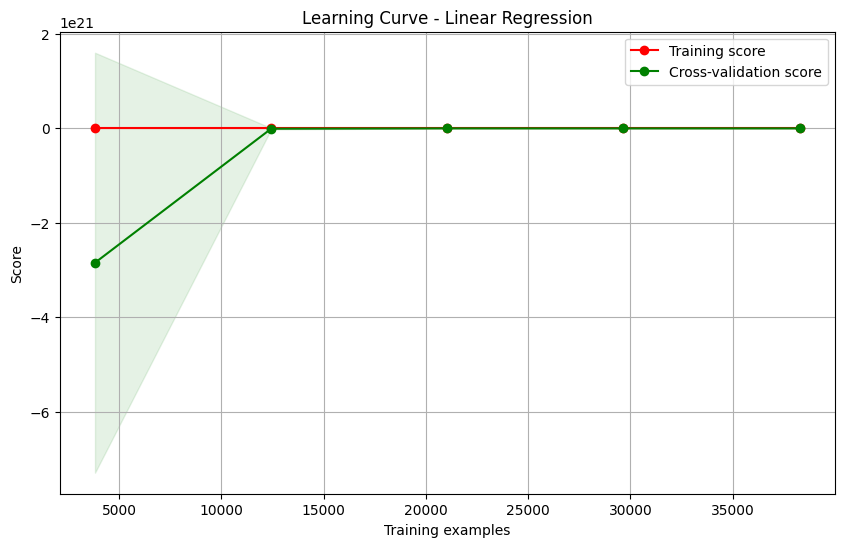

Cross-Validation Scores - Linear Regression: [5.15984013e+06 9.65960002e+23 7.36076947e+06 1.59735132e+06
 3.87940277e+07]
Mean CV Score - Linear Regression: 1.9319200049912648e+23


c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.810e+09, tolerance: 7.729e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.372e+09, tolerance: 1.114e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

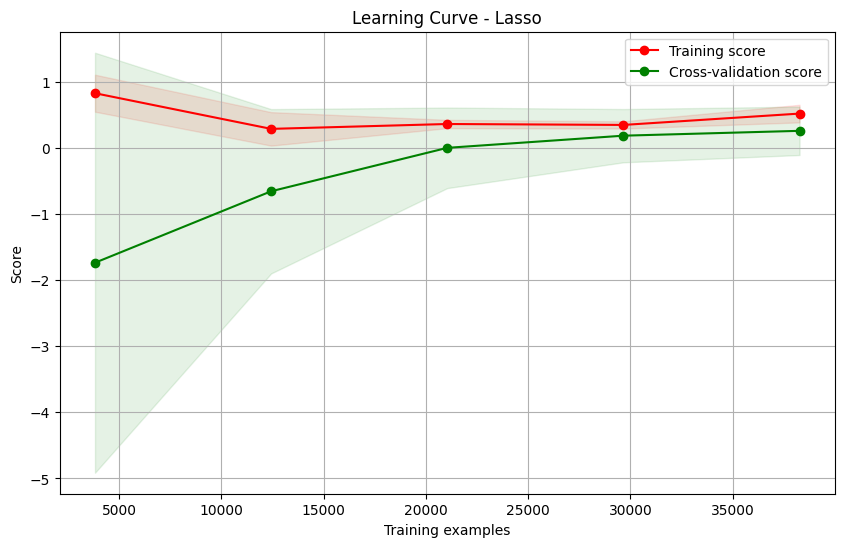

Cross-Validation Scores - Lasso: [ 4529848.96802143 86880519.94656387  7324283.15420254  1494758.07882819
 19290607.24357606]
Mean CV Score - Lasso: 23904003.47823842


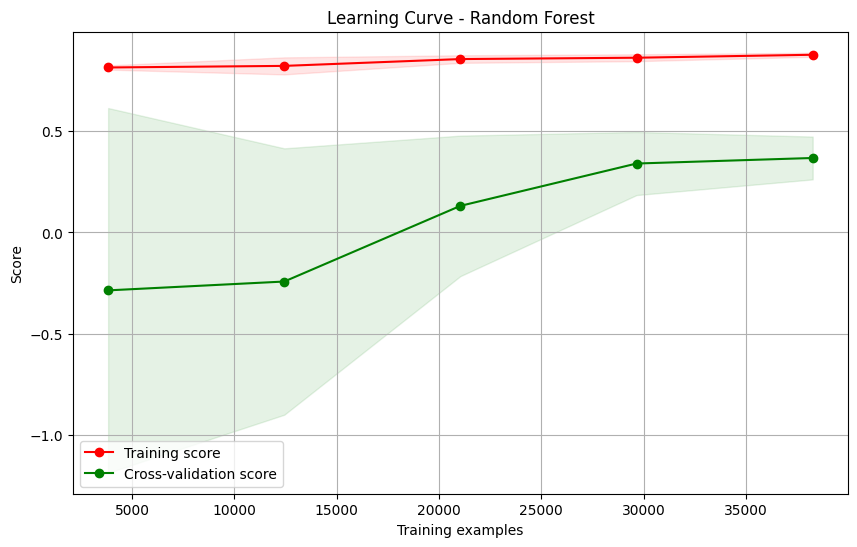

Cross-Validation Scores - Random Forest: [ 4421144.07461417 80516279.57689393  6287866.16214722   744328.18760449
 38974515.1657979 ]
Mean CV Score - Random Forest: 26188826.63341154
[14:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_threads" } are not used.

[14:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_threads" } are not used.

[14:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_threads" } are not used.

[14:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_threads" } are not used.

[14:19:43] WARNING: C

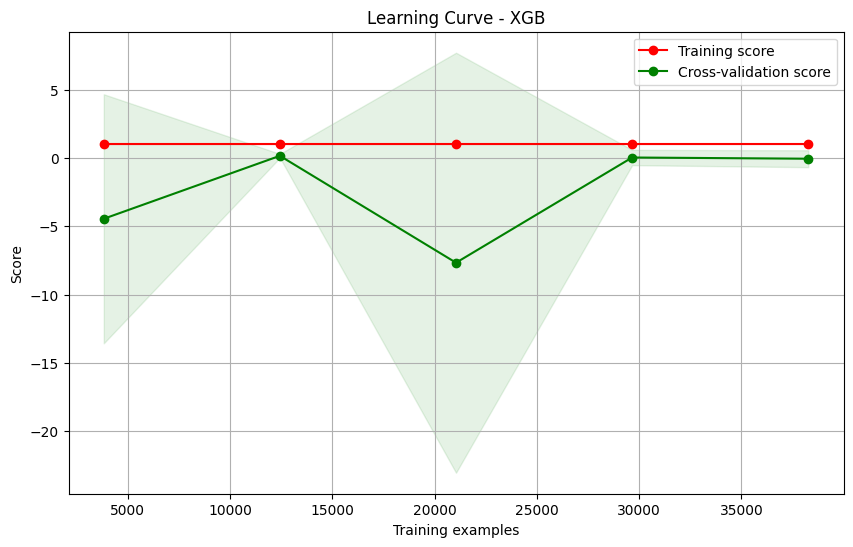

Cross-Validation Scores - XGB: [ 3692719.95067306 98992340.97710526 19321525.37322247  1795575.738123
 29217256.59131852]
Mean CV Score - XGB: 30603883.726088464


In [126]:
# Define the list of models
models = [(lr, "Linear Regression"), (lasso, "Lasso"), (rf, "Random Forest"), (xb, "XGB")]

# Iterate over all the models
for model, name in models:
    # Plot the learning curve using the fitted model
    plot_learning_curve(model, f"Learning Curve - {name}", X_train, y_train, cv=5)
    plt.show()

    # Perform cross-validation using the fitted model
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    cross_val_scores = -cross_val_scores

    print(f"Cross-Validation Scores - {name}:", cross_val_scores)
    print(f"Mean CV Score - {name}:", np.mean(cross_val_scores))

## Hyperparameter Tuning using GridSearchCV

In this code snippet, we perform hyperparameter tuning for the Random Forest regressor using GridSearchCV. Hyperparameter tuning involves finding the optimal values for the hyperparameters of a machine learning model to improve its performance.

1. **Define Parameter Grid:**
   The `param_grid` dictionary defines the grid of hyperparameters that we want to explore during the tuning process. In this case, we consider different combinations of two hyperparameters:
   - `n_estimators`: Number of trees in the forest.
   - `max_depth`: Maximum depth of the individual decision trees.
   
   <br>

2. **Create Random Forest Regressor:**
   We create an instance of the `RandomForestRegressor` model, which is the base model we want to tune.

3. **Create GridSearchCV Object:**
   The `GridSearchCV` class performs an exhaustive search over the specified parameter grid. We pass the base model, the parameter grid, and other parameters like `cv` (number of cross-validation folds) and `n_jobs` (number of CPU cores to use for parallel execution).

4. **Fit GridSearchCV:**
   The `fit` method of the `GridSearchCV` object fits the model on the training data and performs a search for the best combination of hyperparameters. It exhaustively evaluates the performance of each parameter combination using cross-validation.

   After the grid search is complete, we can access the best hyperparameters and model using `grid_search.best_params_` and `grid_search.best_estimator_`.

This process helps us identify the optimal hyperparameters for the Random Forest regressor, enhancing its predictive performance on the test data.


In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object with parallel execution
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]})

## Training and Evaluating the Random Forest Model with Best Parameters

In this code snippet, we retrieve the best parameter values identified through the hyperparameter tuning using GridSearchCV and proceed to train and evaluate a Random Forest regressor using these optimal parameters.

1. **Get Best Parameters and Score:**
   After the GridSearchCV process is completed, the `best_params_` attribute contains a dictionary of the best hyperparameters that resulted in the highest cross-validated score. Similarly, the `best_score_` attribute contains the best mean cross-validated score achieved.

2. **Train and Evaluate with Best Parameters:**
   Using the best parameter values obtained from the grid search, we create a new instance of the `RandomForestRegressor` model named `best_rf`. We initialize this model with the best `n_estimators` and `max_depth` values. The `random_state` parameter is set to ensure reproducibility.

3. **Train the Best Model:**
   We fit the `best_rf` model to the training data (`X_train` and `y_train`) using the `fit` method. This trains the model on the training data.

4. **Predict and Evaluate:**
   After training, we make predictions on the test data (`X_test`) using the trained `best_rf` model. The predicted values are stored in `best_rf_pred`.

By training and evaluating the Random Forest regressor using the best parameter values found during the hyperparameter tuning, we aim to obtain the best possible predictive performance on the test data, which was not used during the tuning process.


In [29]:
# Get the best parameter values and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train and evaluate the Random Forest model with the best parameters
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                random_state=42)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)

## Evaluating and Comparing Model Performance

In this section, we evaluate the performance of the best Random Forest model obtained through hyperparameter tuning and compare it with the performance of the original Random Forest model. We calculate various metrics to assess the predictive capability of the models and visualize their feature importance.

1. **Calculate Metrics for the Best Random Forest Model:**
   Similar to the previous models, we calculate various performance metrics for the predictions made by the `best_rf` model on the test data. These metrics include the coefficient of determination (R-squared), mean squared error (MSE), root mean squared error (R-MSE), and mean absolute error (MAE).

2. **Comparing Model Performance:**
   We create a table comparing the performance metrics of the regular Random Forest model and the best Random Forest model using the calculated metrics. The table is printed using the `tabulate` library, showing R-squared, MSE, R-MSE, and MAE for each model.

3. **Visualizing Feature Importance:**
   We visualize the top feature importance scores of the best Random Forest model using a bar plot. The plot highlights the relative importance of different features in predicting the target variable (Peak CCU). The top 10 features with the highest importance scores are displayed in the bar plot.

By evaluating and comparing the metrics of different models and visualizing feature importance, we gain insights into the performance of the models and understand which features play a significant role in predicting the target variable.


| Model                            |   R-Square |         MSE |   R-MSE |     MAE |
|:---------------------------------|-----------:|------------:|--------:|--------:|
| Regular Random Forest            |   0.358196 | 6.80432e+06 | 2608.51 | 109.547 |
| Best Random Forest (Grid Search) |   0.466977 | 5.65104e+06 | 2377.19 | 103.168 |


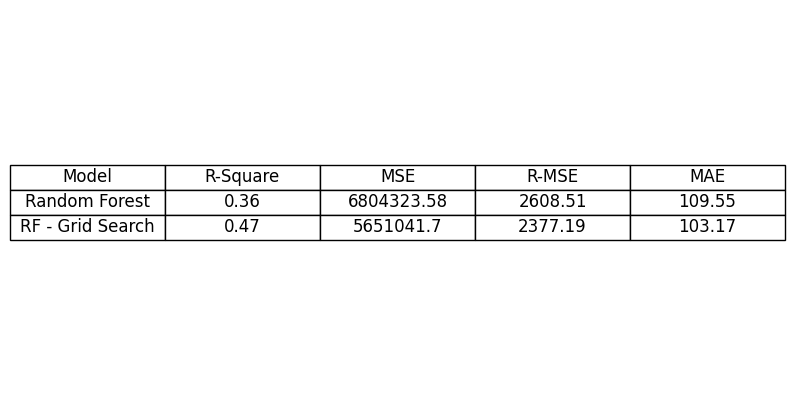

<Axes: >

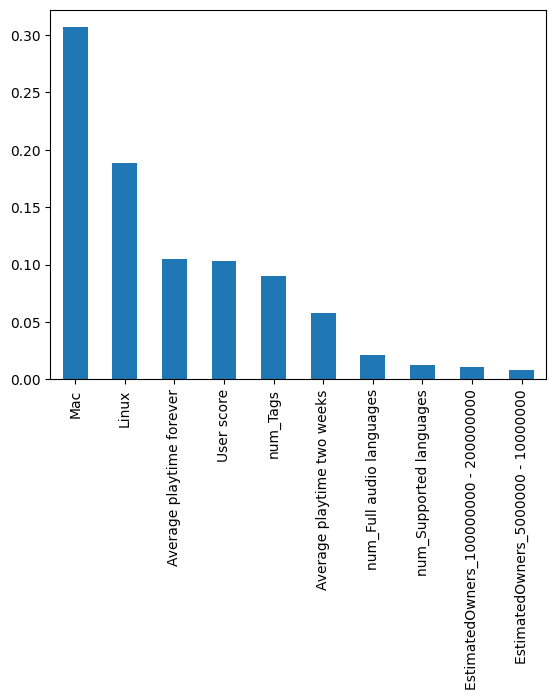

In [30]:
# Calculate metrics for the best Random Forest model
best_rf_rsqr = r2_score(y_test, best_rf_pred)
best_rf_mse = mean_squared_error(y_test, best_rf_pred)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)

# Create a list of model names, scores, MSE, R-MSE, and MAE
model_names = ['Regular Random Forest', 'Best Random Forest (Grid Search)']
scores = [rf_rsqr, best_rf_rsqr]
mse = [rf_mse, best_rf_mse]
rmse = [rf_rmse, best_rf_rmse]
mae = [rf_mae, best_rf_mae]

# Create a table using the tabulate library
table = zip(model_names, scores, mse, rmse, mae)
headers = ["Model", "R-Square", "MSE", "R-MSE", "MAE"]
table_str = tabulate(table, headers=headers, tablefmt="pipe")

# Define the data as a list of lists
data = [
    ["Random Forest", rf_rsqr.round(2), rf_mse.round(2), rf_rmse.round(2), rf_mae.round(2)],
    ["RF - Grid Search", best_rf_rsqr.round(2), best_rf_mse.round(2), best_rf_rmse.round(2), best_rf_mae.round(2)]]

# Define the headers for the table
headers = ["Model", "R-Square", "MSE", "R-MSE", "MAE"]

# Create the table plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=data, colLabels=headers, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Display the plot
plt.show()

# Random Forest feature importance
best_rf_feature_importance = best_rf.feature_importances_
best_rf_feature_names = X.columns
forest_importances = pd.Series(best_rf_feature_importance, index=best_rf_feature_names)

forest_importances.sort_values(ascending=False).head(10).plot(kind='bar')

## Principal Component Analysis (PCA) for Dimensionality Reduction and Visualization

In this section, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the feature space and visualize the data in a 2D plane.

1. **Creating a PCA Object:**
   We create a PCA object using the `PCA` class from the `sklearn.decomposition` module. We specify `n_components=2` to indicate that we want to reduce the data to two principal components.

2. **Applying PCA on the Data:**
   We apply PCA on the feature matrix `X` using the `fit_transform` method. This transforms the original data into a new space defined by the principal components.

3. **Creating a New DataFrame with PCA Components:**
   We create a new DataFrame called `df_pca` to store the two principal components (`PC1` and `PC2`). These components represent the transformed features obtained from PCA.

4. **Concatenating with Target Variable:**
   We concatenate the principal components DataFrame `df_pca` with the target variable `y` to have a combined DataFrame for visualization.

5. **Visualizing Data in 2D:**
   We create a scatter plot to visualize the data points in the two-dimensional PCA space. Each point is represented by its values along `PC1` and `PC2`. The color of the points is determined by the corresponding `Peak CCU` values, using the 'viridis' color map. A transparency of 0.5 is applied to make overlapping points more visible.

6. **Plot Customization:**
   We add axis labels, a title, and a color bar to the plot for better understanding. The color bar indicates the range of `Peak CCU` values corresponding to the color map.

By applying PCA and visualizing the data in a reduced-dimensional space, we gain insights into the data's structure and can potentially identify patterns or clusters that are not evident in the original high-dimensional space.


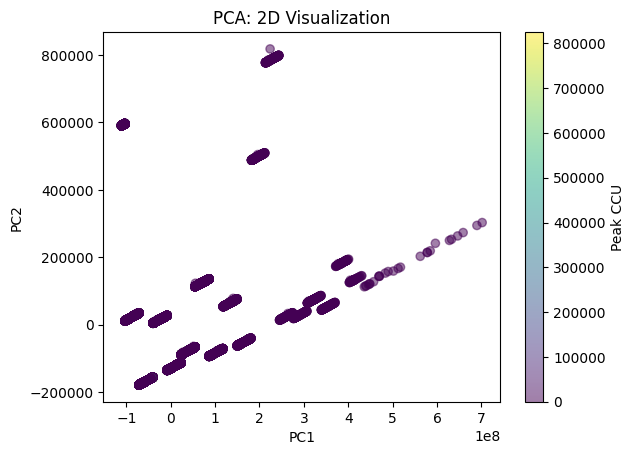

In [31]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Apply PCA on your data
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Concatenate the PCA components with the target variable
df_pca = pd.concat([df_pca, y], axis=1)

# Visualize the data in 2D with more transparent points
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Peak CCU'], cmap='viridis', alpha =0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: 2D Visualization')
plt.colorbar(label='Peak CCU')
plt.show()

## K-Means Clustering and Elbow Method for Optimal Cluster Selection

In this section, we perform K-means clustering on the dataset to find an optimal number of clusters using the Elbow method and silhouette score.

1. **Creating a Range of Clusters:**
   We define a range of cluster values from 2 to 29 (inclusive) using the `range` function. The purpose is to test various numbers of clusters.

2. **Initialization of Variables:**
   We initialize an empty list `inertia` to store the within-cluster sum of squares (inertia) for different cluster values. We also initialize variables `min_sil` and `num_cluster` to keep track of the minimum silhouette score and the corresponding number of clusters, respectively.

3. **Loop through Cluster Values:**
   For each value of `k` in the range of cluster values:
   - We create a KMeans object using `KMeans` from the `sklearn.cluster` module and fit it to the data.
   - We append the inertia value (within-cluster sum of squares) to the `inertia` list.
   
   <br>
4. **Calculate Silhouette Score:**
   Within the loop, we calculate the silhouette score for the current clustering. If the silhouette score is lower than the previous minimum (`min_sil`), we update `min_sil` and `num_cluster` with the current silhouette score and number of clusters.

5. **Plot Elbow Curve:**
   We plot the elbow curve to visualize the inertia values for different numbers of clusters. The curve helps us identify the "elbow point" where the inertia starts to decrease at a slower rate, which is often indicative of the optimal number of clusters.

6. **Plot Customization:**
   We add axis labels, a title, and adjust the x-axis ticks to match the range of cluster values.

7. **Interpretation:**
   The optimal number of clusters can be determined by observing the elbow point on the plot, where the inertia starts to level off. Additionally, the silhouette score (`min_sil`) provides another perspective on cluster quality, favoring values closer to 1.

By performing K-means clustering and using the Elbow method along with silhouette score evaluation, we aim to find an appropriate number of clusters that best represent the underlying structure of the data.


c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

0.5301237939112877 28


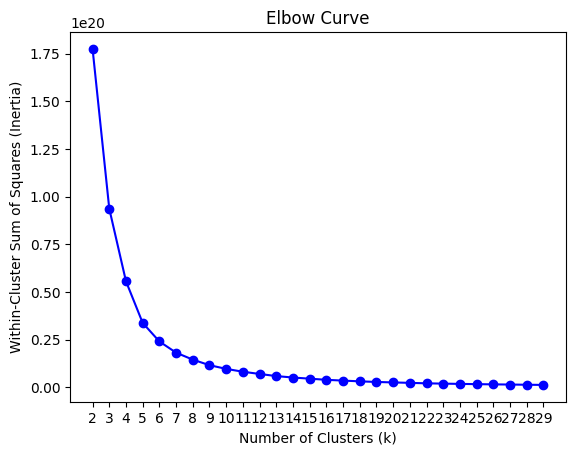

In [32]:
# Perform K-means clustering with a range of clusters
inertia = []
min_sil = float("inf")
num_cluster = 0
k_values = range(2, 30)
X = df  # Make X the entire data frame to create clusters by peak CCU

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg < min_sil:
        min_sil = silhouette_avg
        num_cluster = k

print(min_sil, num_cluster)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve')
plt.xticks(range(min(k_values), max(k_values) + 1, 1))
plt.show()

## Choosing the Optimal Number of Clusters and K-Means Clustering

In this section, we determine the optimal number of clusters for K-means clustering and then perform the clustering with that number of clusters.

1. **Choosing the Optimal Number of Clusters:**
   Based on the insights gained from the Elbow curve and silhouette score analysis, we have determined that the optimal number of clusters for our data is `28`. This value is set as `k_optimal` for the subsequent clustering.

2. **Performing K-means Clustering:**
   Using the `KMeans` class from the `sklearn.cluster` module, we create a K-means clustering model with the chosen number of clusters (`k_optimal`). The `random_state` is set to ensure reproducibility of results.

3. **Fitting the Model:**
   We fit the K-means model to the data (`X`) using the `fit` method. The model will assign each data point to one of the `28` clusters based on their features.

By choosing the optimal number of clusters and performing K-means clustering with that number of clusters, we aim to group similar data points together in order to reveal underlying patterns or structures within the data.


In [33]:
# Choose the optimal number of clusters
k_optimal = 28

# Perform K-means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X)

c:\Users\doron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=28, random_state=42)

## Analyzing Clusters and Visualizing Cluster Analysis

In this section, we analyze the clusters that were generated by the K-means algorithm and visualize the cluster analysis to gain insights into the characteristics of each cluster.

1. **Assigning Cluster Labels:**
   We assign cluster labels to the original dataset by adding a new column named `Cluster_Labels`. Each data point in the dataset is labeled with the cluster it belongs to, based on the K-means clustering.

2. **Cluster Analysis:**
   We analyze the clusters by calculating the mean values of selected numeric features (`'Peak CCU'`, `'Required age'`, `'Price_(usd)'`, etc.) within each cluster. This analysis provides an overview of the average characteristics of each cluster.

3. **Normalization of Cluster Analysis Data:**
   To ensure fair comparison across features with different scales, we normalize the cluster analysis data using Min-Max scaling. This scaling technique transforms the data to a common range between 0 and 1, allowing for meaningful comparison.

4. **Cluster Analysis Visualization:**
   We visualize the cluster analysis using a grouped bar plot. Each bar in the plot represents the normalized mean value of a numeric feature for each cluster. The x-axis represents cluster labels, and the y-axis represents the normalized mean values of the features. The legend indicates the features being analyzed.

By analyzing and visualizing the clusters, we can understand the distinguishing characteristics of each cluster and potentially identify patterns or insights that can guide further analysis or decision-making.


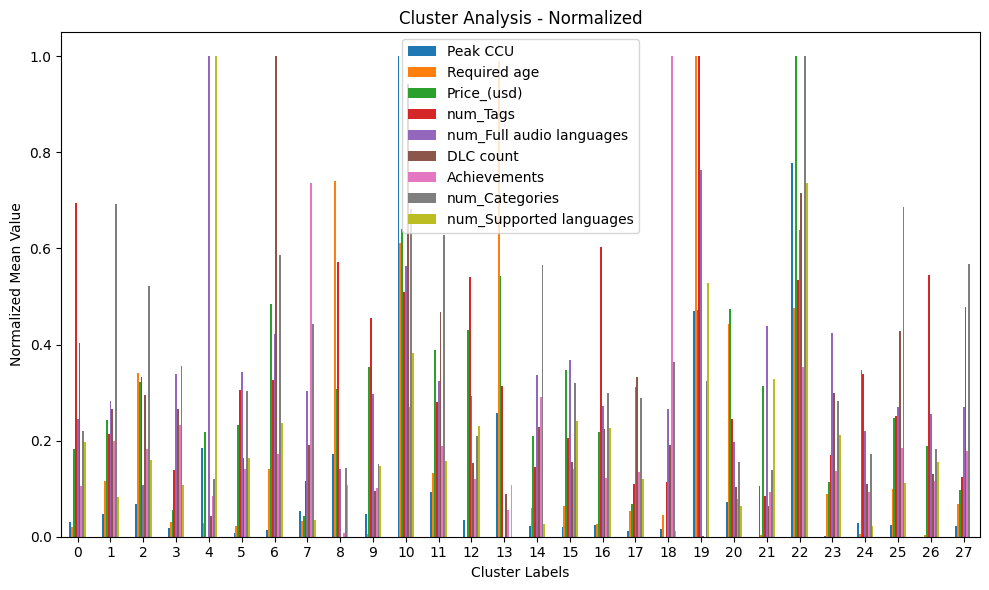

In [34]:
# Assign cluster labels to the original dataset
df['Cluster_Labels'] = kmeans.labels_

# Analyze the clusters
numeric_features = ['Peak CCU', 'Required age', 'Price_(usd)', 'num_Tags', 'num_Full audio languages', 'DLC count', 'Achievements', 'num_Categories', 'num_Supported languages']

cluster_analysis = df.groupby('Cluster_Labels')[numeric_features].mean()

# Normalize the cluster_analysis data using Min-Max scaling
scaler = MinMaxScaler()
cluster_analysis_normalized = pd.DataFrame(scaler.fit_transform(cluster_analysis), columns=cluster_analysis.columns)

# Plot the cluster analysis using a grouped bar plot with normalized data
cluster_analysis_normalized.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster Labels')
plt.ylabel('Normalized Mean Value')  # Update ylabel to indicate normalization
plt.title('Cluster Analysis - Normalized')
plt.legend(loc='best')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Visualizing Top Clusters in Cluster Analysis

In this section, we visualize the cluster analysis by focusing on the top clusters with the highest average `'Peak CCU'` values. This visualization allows us to observe the normalized mean values of selected numeric features within these top clusters.

1. **Sorting by Peak CCU:**
   We start by sorting the `cluster_analysis_normalized` DataFrame based on the normalized mean values of `'Peak CCU'` feature in descending order. This helps us identify the clusters with the highest average peak concurrent users (CCU).

2. **Selecting Top Clusters:**
   Next, we select the first three clusters with the highest normalized mean values of `'Peak CCU'`. We create a new DataFrame named `cluster_analysis_first3` to store the information of these top clusters.

3. **Visualization Using Grouped Bar Plot:**
   We visualize the cluster analysis of the top clusters using a grouped bar plot. Each bar in the plot represents the normalized mean value of a numeric feature for each cluster. The x-axis represents cluster labels, and the y-axis represents the normalized mean values of the features. The legend indicates the features being analyzed.

4. **Legend Placement:**
   The legend is placed at the upper left corner of the plot, using the `bbox_to_anchor` parameter to adjust its position. You can modify the `bbox_to_anchor` values to change the legend's position as needed.

By visualizing the top clusters' characteristics, particularly in terms of `'Peak CCU'` values, we can gain insights into the clusters that exhibit high user engagement and understand the patterns that contribute to their performance.


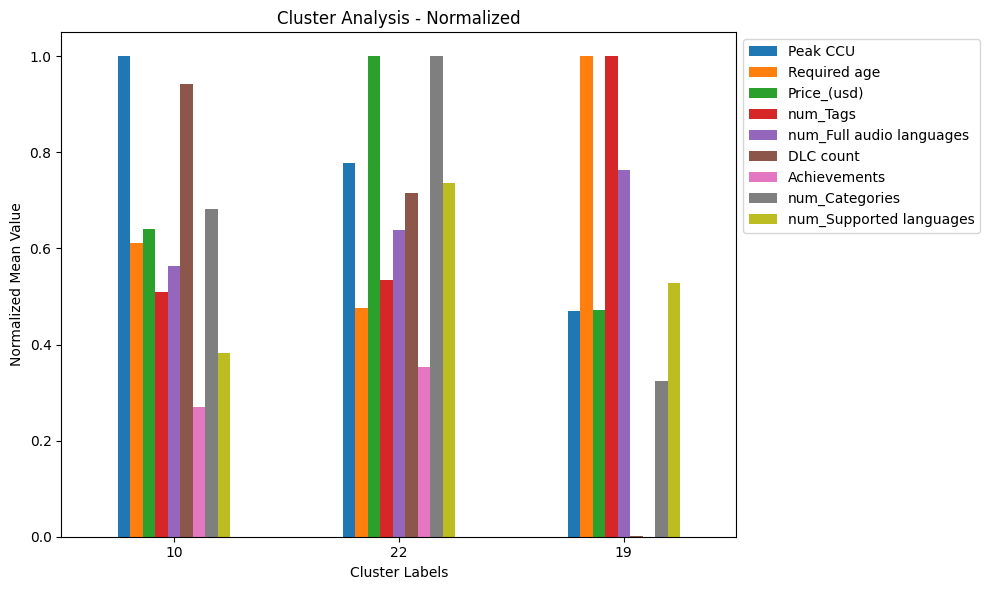

In [35]:
# Sort by Peak CCU
sorted_clusters = cluster_analysis_normalized.sort_values(by="Peak CCU", ascending=False)

# Keep only the first 3 clusters
cluster_analysis_first3 = sorted_clusters.iloc[:3]

# Plot the cluster analysis using a grouped bar plot with normalized data
ax = cluster_analysis_first3.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster Labels')
plt.ylabel('Normalized Mean Value')  # Update ylabel to indicate normalization
plt.title('Cluster Analysis - Normalized')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust loc and bbox_to_anchor for desired position
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()